In [46]:
# Import packages
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
import networkx as nx 
import osmnx as ox 
import numpy as np 
import seaborn as sns 
from shapely.geometry import Point, LineString
from tqdm import tqdm
import matplotlib.pyplot as plt
import folium

# Display all columns in the df
pd.set_option('display.max_columns', None)
# Set the float format to display numbers in standard decimal notation
pd.options.display.float_format = '{:.5f}'.format

In [47]:
# Read in the road network graph
# This is the already somewhat simplified network - showing only eRoads
with open("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph_eRoad.pickle", 'rb') as file:
    G = pickle.load(file)

# This netowrk is not adjusted and not simplified at all
with open("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph0_3NOR_wagrades.pickle", 'rb') as file:
    H = pickle.load(file)


/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_35080/2464811990.py:4: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  G = pickle.load(file)
/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_35080/2464811990.py:8: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  H = pickle.load(file)


In [48]:
# create a dictionary mapping node IDs to (x, y) coordinates
node_coords = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

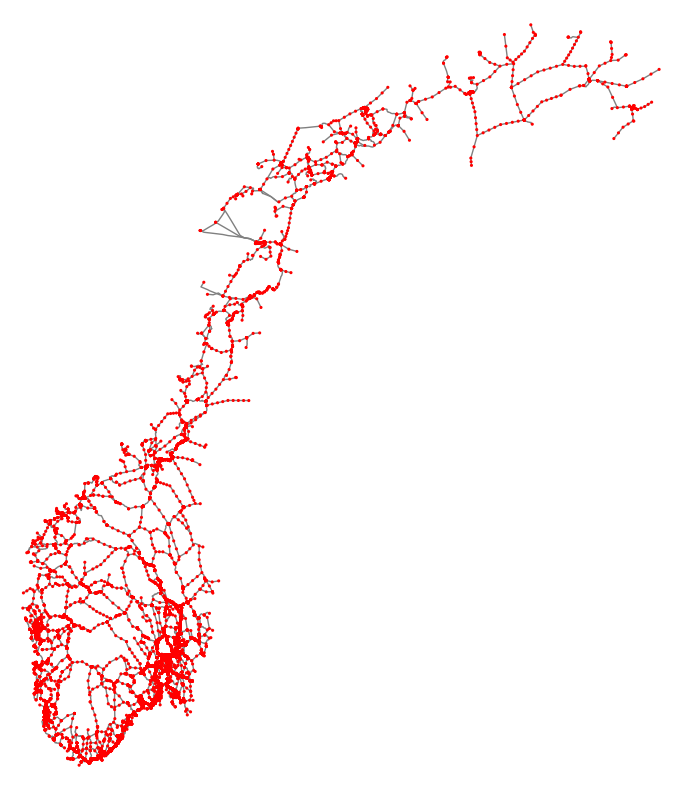

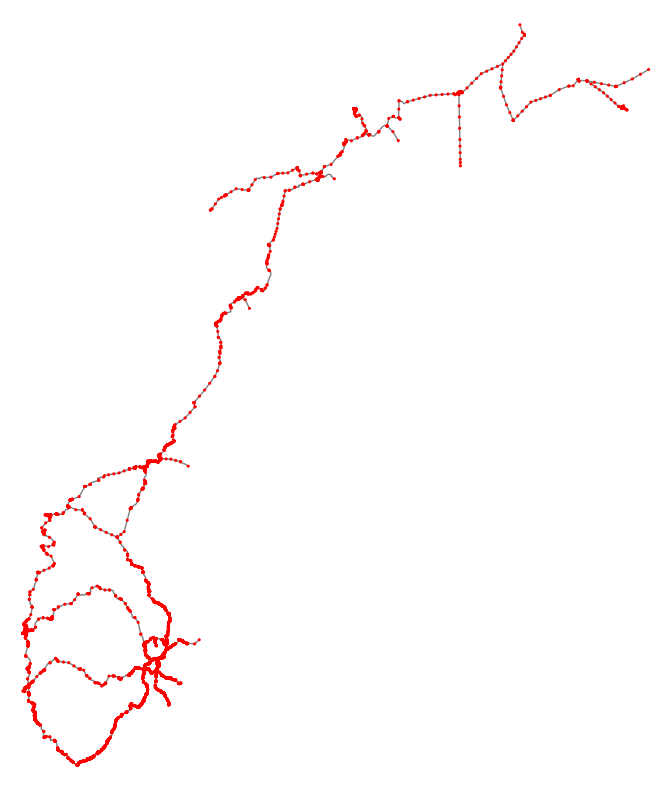

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

In [49]:
#Plot graphs
ox.plot_graph(H, figsize = (10, 10), node_color="red", edge_color = "gray", bgcolor = "white", node_size=5, edge_linewidth = 1)
ox.plot_graph(G, figsize = (10, 10), node_color="red", edge_color = "gray", bgcolor = "white", node_size=5, edge_linewidth = 1)

In [50]:
# Store node attributes in a dictionary
node_attrs = {}
for node, attrs in G.nodes(data=True):
    node_attrs[node] = attrs

# Create a DataFrame from the node attributes
node_df = pd.DataFrame.from_dict(node_attrs, orient='index')

# Convert the edge data to a pandas DataFrame
edge_data = G.edges(data=True)
edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

# Extract the data into separate columns
edge_df = pd.concat([edge_df.drop('data_dict', axis=1), edge_df['data_dict'].apply(pd.Series)], axis=1)

In [51]:
# Print the resulting DataFrames
display(edge_df.head())
display(node_df.head())
print("Other than source and target, the actual only interesting attribute in edge_df is:   \033[1mlength, length_weight, grade, grade_abs, and geometry\033[0m")

,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
0,155191,155273,138086,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.01758,15.29121,15.29121,155191,155273,-0.03000,0.03000,NaN
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.74388,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]",LINESTRING (11.127465806112035 60.786204560258...
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.85930,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]",LINESTRING (11.127184981853482 60.786428543984...
3,155201,155289,138110,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.01356,11.79034,11.79034,155289,155201,0.01300,0.01300,NaN
4,155201,351618,"[2168673, 138022, 362732, 363598, 2168670]",False,E6,E6,0,0,0,0,0,110,"[0.025416070719352715, 0.16287845422361258, 0....",377.46877,"[65.06593976101533, 259.6613038347447, 4.91549...","[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]","[0.028, 0.056, 0.025, 0.053, 0.042]","[0.028, 0.056, 0.025, 0.053, 0.042]",LINESTRING (11.125266280578165 60.789677274131...


,x,y,osmid,roadclass,isBridge,isTunnel,geometry,elevation,artificial
155191,11.12747,60.78620,155191,0,0,0,POINT (11.127465806112035 60.78620456025842),143.16000,NaN
155201,11.12718,60.78643,155201,0,0,0,POINT (11.127184981853482 60.78642854398455),142.70000,NaN
155273,11.12753,60.78633,155273,0,0,0,POINT (11.127534712389643 60.78633428345484),142.70500,NaN
155289,11.12740,60.78642,155289,0,0,0,POINT (11.127399824588059 60.786415782679235),142.54300,NaN
155971,11.99383,60.18919,155971,0,0,0,POINT (11.993829462815306 60.189188517538796),155.40800,NaN


Other than source and target, the actual only interesting attribute in edge_df is:   length, length_weight, grade, grade_abs, and geometry


In [52]:
# Check number of NaN in geometry column
nodes_nans = node_df["geometry"].isna().sum()
print(f"IN NODES:   The column geometry contains {nodes_nans} of", len(node_df), "NaN values.")

edges_nans = edge_df["geometry"].isna().sum()
print(f"IN EDGES:   The column geometry contains {edges_nans} of", len(edge_df), "NaN values.")


IN NODES:   The column geometry contains 0 of 6944 NaN values.
IN EDGES:   The column geometry contains 1629 of 9807 NaN values.


In [53]:
# Drop all edges without a geometry column
edge_df.dropna(subset=["geometry"], inplace=True)
edges_nans = edge_df["geometry"].isna().sum()
print(f"IN EDGES:   The column geometry contains {edges_nans} of", len(edge_df), "NaN values.")

IN EDGES:   The column geometry contains 0 of 8178 NaN values.


In [54]:
# Convert the dataframes to geodataframes, using the "geometry" column as the geometry
edge_gdf = gpd.GeoDataFrame(edge_df, geometry="geometry")
node_gdf = gpd.GeoDataFrame(node_df, geometry="geometry")

In [55]:
# Very much data - to much
display(node_gdf.info())
display(edge_gdf.info())
print("Very much data - to much.")

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6944 entries, 155191 to 1854920
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   x           6944 non-null   float64 
 1   y           6944 non-null   float64 
 2   osmid       6944 non-null   int64   
 3   roadclass   6944 non-null   int64   
 4   isBridge    6944 non-null   int64   
 5   isTunnel    6944 non-null   int64   
 6   geometry    6944 non-null   geometry
 7   elevation   6944 non-null   float64 
 8   artificial  130 non-null    object  
dtypes: float64(3), geometry(1), int64(4), object(1)
memory usage: 542.5+ KB


None

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8178 entries, 1 to 9806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   source         8178 non-null   int64   
 1   target         8178 non-null   int64   
 2   id             7993 non-null   object  
 3   oneway         8178 non-null   bool    
 4   ref            8178 non-null   object  
 5   name           8178 non-null   object  
 6   funcroadclass  8178 non-null   int64   
 7   roadclass      8178 non-null   object  
 8   isFerry        8178 non-null   object  
 9   isBridge       8178 non-null   object  
 10  isTunnel       8178 non-null   object  
 11  speedlim       8178 non-null   object  
 12  drivetime      7993 non-null   object  
 13  length         8178 non-null   float64 
 14  length_weight  7993 non-null   object  
 15  u              7993 non-null   object  
 16  v              7993 non-null   object  
 17  grade          8178 non-n

None

Very much data - to much.


To many nodes on the same locations...


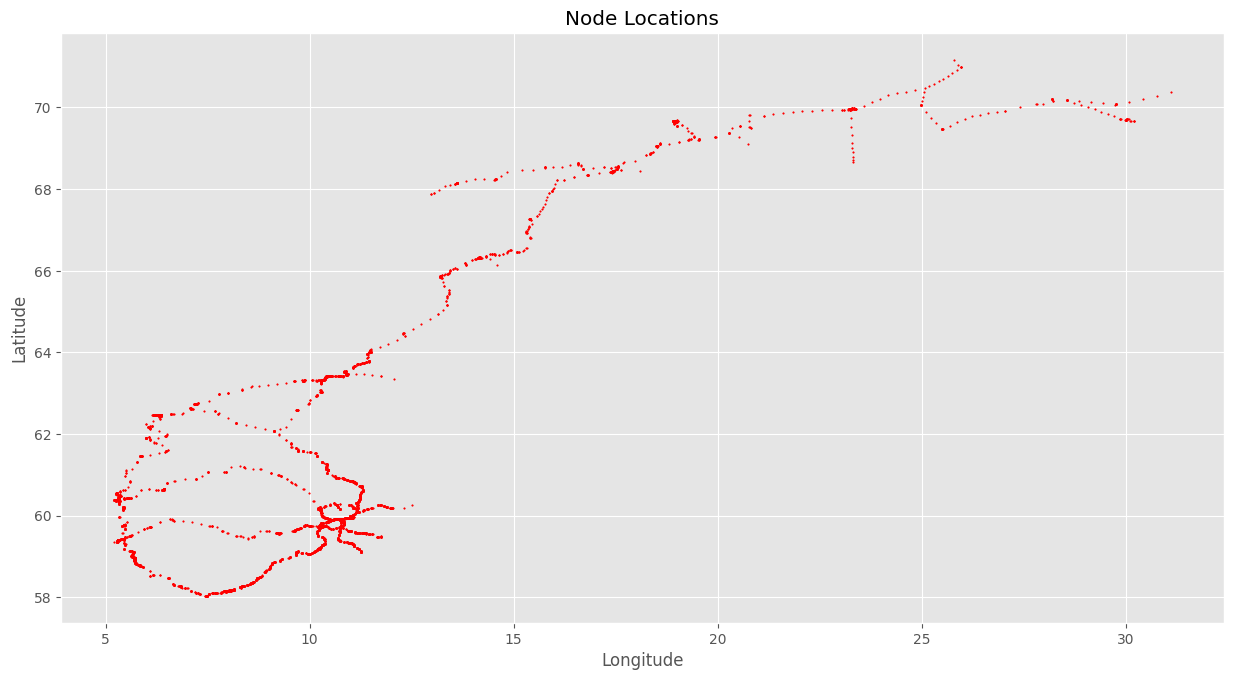

In [56]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(15, 10))
node_gdf.plot(ax=ax, markersize=1, color = 'red')

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

print("To many nodes on the same locations...")
# Display the plot
plt.show()


Same plot but with the edges as well


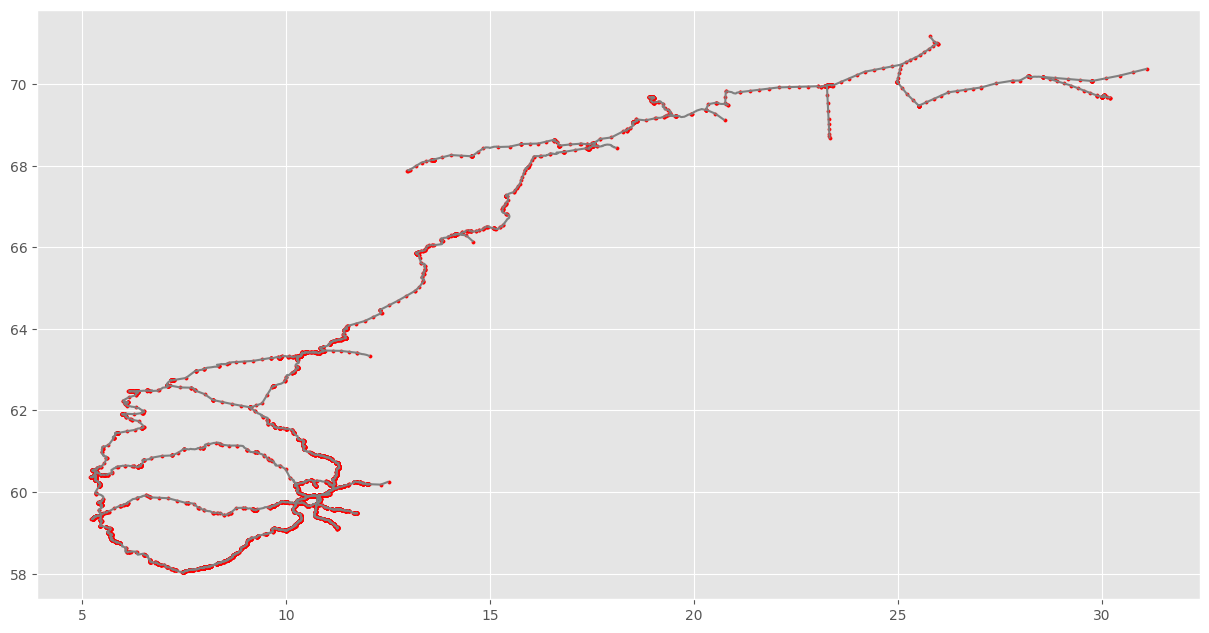

In [57]:
# Same plot but with the edges as well
# Set the size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the nodes and edges
node_gdf.plot(ax=ax, color='red', markersize=5)
edge_gdf.plot(ax=ax, color='gray')

# Show the plot
print("Same plot but with the edges as well")
plt.show()


<h3>We will from the network above make a more simplified network<h3>

In [58]:
# The ID´s of the nodes we want to keep:
node_ids = [
363114, 155191, 351102, 229327, 1287001, 294257, 1210066, 1550099, 1549832, 1548053, 1166768, 1391983, 1355042, 1540900, 1354548, 1596708, 1831177, 346860, 1361083, 1820460, 273005, 264633, 212063, 264384, 733439,
249770, 1621813, 1620935, 1287788, 226166, 1035188, 225533, 1804949, 1358093, 825322, 1401860, 1360772, 1653413, 744348, 655059, 1692454, 322944, 717788, 1259667, 733331, 717094, 1367541, 1368219, 1359263, 1357128, 
1359748, 1534536, 1363061, 729893, 1068477, 645755, 521003, 734848, 518987, 1356899, 1388481, 1059419, 646017, 646755, 1498010, 1499783, 1583718, 1583052, 1502720, 1241680,1356545, 1361908, 475528, 1357826, 473308, 1502547, 1520568, 1502400, 
1502160, 1047298, 1059253, 1059028, 1457640, 1520306, 1359965, 1297915, 1117282, 344396, 918793, 1160470, 1461371, 419975, 1353166, 1391824, 1353882, 1457875, 1300885, 591920, 1148914, 1148963, 932927, 875935, 892203, 
815860, 816117, 932076, 938601, 939342, 1525237, 925287, 819302, 819545, 947862, 837851, 834022, 518394, 1277008, 904906, 1305301, 959684, 884154, 861726, 778683, 439557, 931408, 935675, 1164626, 1165904, 
917667, 633563, 1835024, 1064864, 1063773, 1058365, 1107032, 363094, 1169582, 1168841, 1114554, 442791, 939314, 1837088, 1112692, 1119099, 443012, 1253262, 786013, 359628, 356907, 1244249, 
360832, 974682, 1308424, 1294532, 783491, 352537, 677129, 785659, 1211419, 1202331, 780210, 373466, 1767627, 1251008, 1306941, 278721, 1306939, 1220377, 1236482, 518781, 519032, 519215, 1854804, 519657, 
519871, 356470, 1218458, 520142, 950607, 1854811, 520266, 1854850, 1854805, 1854873, 1757217, 1757294, 1178154, 456094, 960370, 1854799, 1212916, 1742443, 356803, 1790694, 1714915, 347578, 354561, 1091549,
1753909, 1753950, 1292044, 824526, 1761273, 1311226, 786184, 1854829, 263259, 343979, 120302, 239563, 240306, 338653, 341391, 941568, 1655795, 981136, 1695865, 1797345, 329937, 1703037, 1761012, 
1751958, 1752000, 1847362, 1255189, 1753123, 1244158, 1810129, 1244173, 1447438, 1752379, 1757410, 1751303, 1762198, 1798422, 1774526, 1754488, 1757182, 1757211, 1847506, 1752913, 1291319, 1622377, 1757013, 1757052, 
1757063, 1854845, 687472, 1661302, 1342897, 460424, 1854801, 1811243, 1662585, 1455254, 1854841, 982313, 1263183, 1242665, 1663567, 1854835, 1656101, 951446, 664979, 1656119, 1667799, 1854844, 
1670339, 1659666, 1819808, 730907, 320750, 943010, 943332, 1205589, 1854836, 323551, 645165, 1220506, 945389, 1234021, 1218653, 1209902, 1207592, 1218415, 1211360, 943633, 1552659, 1220312, 943904, 943905, 1853430, 
1853486, 1233937, 1854796, 332952, 945719, 343936, 944789, 345153, 345690, 1854797, 936216, 1173462, 345756, 960480, 587711, 1854889,  356032, 355924, 362649, 358102, 326002, 332126, 331992, 232649, 
232847, 232965, 293304, 293574, 293678, 233289, 233695, 328981, 328559, 1053393, 328043, 328308, 235735, 1161983, 236596, 236965, 1854846, 1854793, 1854869, 957034, 1854810, 1262340, 1854867, 1854838, 1854890, 444183, 1114288, 660263, 
601243, 579725, 556936, 1204452, 981995, 664358, 621046, 1050156, 656715, 673595, 673499, 1050042, 622986, 601834, 621503, 621605, 1591175, 601899, 601845, 623104, 579107, 452992, 579231, 255966, 1244855,
982265, 1854859, 1854820, 1854882, 602188, 902303, 627813, 628008, 628147, 541335, 203067, 203338, 628790, 622372, 532078, 628971, 541694, 541794, 567100, 630261, 497797, 592884, 1854837, 1854866, 1240203, 612442, 597346, 582037, 581827, 
581633, 581536, 600113, 621923, 184851, 1854807, 1854874, 621978, 622201, 1854852, 1854808, 1854875, 634052, 1854809, 826281, 674327, 375163, 1764735, 429135, 619605, 1854806, 932344, 659061, 658639, 658705, 658738, 658913, 658947, 
658978, 474029, 474067, 474526, 47559, 474788, 475173, 475424, 1494993, 984851, 395203, 600782, 984889, 984897, 1854822, 975964, 490719, 368717, 690247, 672996, 1570377, 353427, 1571858, 374652, 599379, 355303, 354996, 355108, 355216, 785532, 
467677, 348200, 925506, 957739, 476859, 476941, 477134, 1854802, 1303455, 429248, 1095056, 1854898, 1854865, 1854912, 1854833, 1854905, 1854888, 1854919, 425412, 1274054, 1854868, 1854839, 1854891, 426202, 480059, 
480347, 1572082, 1854842, 290493, 253044, 990173, 1170474, 1225629, 430614, 331452, 431864, 432008, 439279, 1854800, 439585, 1012611, 1012732, 1012835, 1854861, 1854828, 1854884, 1278515, 1854840, 
975434, 982469, 1854821, 941253, 1854849, 1854803, 1854872, 283367, 293924, 1854847, 1854794, 1854870, 448431, 1781068, 331534, 917559, 1854827, 1040580, 918139, 1806461, 739490, 1616680, 1005467, 1005585, 1016544, 1854826, 1016548, 
1006350, 1006563, 1016827, 644771, 1011677, 1011753, 1017172, 1011881, 1011888, 1045653, 281536, 461376, 935246, 1012112, 1012181, 1226405, 1017224, 1027717, 1015021,1016957, 1017026, 323285, 1854825, 1010761, 1854795, 665731, 368090, 1854798, 
1854871, 1808899, 1009585, 1854896, 1854860, 1854910, 1854824, 1854883, 1824695, 978654, 1048365, 1854897, 1854862, 1854911, 1854830, 1854904, 1854885, 1854918, 1854920, 973741, 979032, 424527, 972167, 1854892, 1854853, 1854906, 1854812, 
1854899, 1854876, 1854913, 973790, 1854893, 1854855, 1854907, 1854814, 1854900, 1854878, 1854914, 1098392, 1854834, 989213, 1854854, 1854813, 979185, 1854857, 1854817, 1084015, 1854858, 1854909, 1854902, 1854916, 1100062, 1854815, 1854823, 967923, 1096451, 
1854863, 1854831, 1854886, 969943, 1854894, 1854856, 1854908, 1854816, 1854901, 1854879, 1854915, 1096879, 1096416 
]

In [59]:
# Create a boolean mask indicating which rows have the desired IDs
mask = node_gdf['osmid'].isin(node_ids)

# create a new geodataframe with only the desired rows
new_gdf_ids = node_gdf[mask].copy()

# reset the index of the new geodataframe
new_gdf_ids.reset_index(drop=True, inplace=True)

new_gdf_ids.info()
print("Around 600 entries.")


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   x           619 non-null    float64 
 1   y           619 non-null    float64 
 2   osmid       619 non-null    int64   
 3   roadclass   619 non-null    int64   
 4   isBridge    619 non-null    int64   
 5   isTunnel    619 non-null    int64   
 6   geometry    619 non-null    geometry
 7   elevation   619 non-null    float64 
 8   artificial  114 non-null    object  
dtypes: float64(3), geometry(1), int64(4), object(1)
memory usage: 43.6+ KB
Around 600 entries.


In [60]:
# Manually make the edges between the nodes - may use a code for doing this - "finding nearest neighbour" or something (?)
edges_list =[
(363114, 155191),
(155191, 351102),
(351102, 229327),
(229327, 1287001),
(1287001, 294257),
(294257, 1210066),
(1210066, 1550099),
(1550099, 1549832),
(1549832, 1548053),
(1548053, 1166768),
(1166768, 1391983),
(1391983, 1355042),
(1355042, 1540900),
(1540900, 1354548),
(1354548, 1596708),
(1596708, 1831177),
(1831177, 346860),
(1166768, 1361083),
(1361083, 1820460),
(1820460, 273005),
(273005, 264633),
(264633, 212063),
(212063, 264384),
(264384, 733439),
(264633, 249770),
(249770, 1621813),
(1621813, 1620935),
(1287788, 226166),
(1620935, 226166),
(226166, 1035188),
(1287788, 225533),
(225533, 1804949),
(1804949, 1358093),
(1358093, 825322),
(825322, 1401860),
(1401860, 1360772),
(1360772, 744348),
(1653413, 744348),
(744348, 655059),
(655059, 1692454),
(1692454, 322944),
(322944, 717788),
(1692454, 1259667),
(1259667, 733331),
(733331, 717094),
(717094, 1367541),
(1367541, 1368219),
(1368219, 1359263),
(1359263, 1357128),
(1367541, 733439),
(1357128, 1359748),
(1359748, 1534536),
(1534536, 1363061),
(1363061, 1391983),
(717788, 729893),
(729893, 1068477),
(733331, 521003),
(521003, 734848),
(734848, 518987),
(518987, 1356899),
(1356899, 1068477),
(1068477, 1388481),
(1388481, 1059419),
(1059419, 646017),
(646017, 1498010),
(1498010, 1499783),
(1499783, 1583718),
(1583718, 1583052),
(1583052, 1502720),
(1502720, 1241680),
(1388481, 1356545),
(1356545, 1361908),
(1361908, 475528),
(475528, 1357826),
(1357826, 473308),
(473308, 1502547),
(1502547, 1520568),
(1520568, 1502400),
(1502400, 1502160),
(1502160, 1047298),
(1047298, 1059253),
(1059253, 1059028),
(1059028, 1457640),
(1457640, 1520306),
(1356545, 1359965),
(1359965, 1297915),
(1297915, 1117282),
(1117282, 344396),
(344396, 918793),
(918793, 1160470),
(1160470, 1461371),
(1461371, 419975),
(419975, 1353166),
(1353166, 1391824),
(1391824, 1353882),
(1353882, 1401860),
(1461371, 1457875),
(1457875, 1300885),
(1457875, 591920),
(591920, 1148914),
(1148914, 1148963),
(1148963, 932927),
(932927, 875935),
(875935, 892203),
(892203, 815860),
(815860, 816117),
(816117, 932076),
(932076, 938601),
(938601, 939342),
(939342, 1525237),
(1525237, 925287),
(925287, 819302),
(819302, 819545),
(819545, 947862),
(947862, 837851),
(837851, 834022),
(834022, 518394),
(518394, 1277008),
(1277008, 904906),
(904906, 1305301),
(1305301, 959684),
(959684, 884154),
(884154, 861726),
(861726, 778683),
(778683, 439557),
(439557, 931408),
(931408, 1164626),
(931408, 935675),
(935675, 1164626),
(1164626, 1165904),
(1165904, 917667),
(917667, 633563),
(633563, 1835024),
(1835024, 1064864),
(1064864, 1063773),
(1063773, 1058365),
(1058365, 1107032),
(1107032, 363094),
(363094, 1169582),
(1169582, 1168841),
(1168841, 1114554),
(1114554, 442791),
(442791, 939314),
(939314, 1837088),
(1837088, 1112692),
(1112692, 1119099),
(1119099, 443012),
(443012, 1253262),
(1253262, 786013),
(786013, 359628),
(359628, 356907),
(356907, 1244249),
(1244249, 360832),
(360832, 974682),
(974682, 1308424),
(1308424, 1294532),
(1294532, 783491),
(783491, 352537),
(352537, 677129),
(677129, 785659),
(785659, 1211419),
(1211419, 1202331),
(1202331, 780210),
(373466, 1767627),
(1767627, 1251008),
(1251008, 1306941),
(278721, 1306939),
(1306939, 1220377),
(1220377, 1236482),
(1236482, 518781),
(518781, 519032),
(519032, 519215),
(519215, 1854804),
(1854804, 519657),
(519657, 519871),
(519871, 356470),
(356470, 1218458),
(1218458, 520142),
(520142, 950607),
(950607, 1854811),
(1854811, 520266),
(520266, 1854850),
(1854850, 1854805),
(1854805, 1854873),
(1854873, 1757217),
(1757217, 1757294),
(1757294, 1178154),
(1178154, 456094),
(456094, 960370),
(960370, 1854799),
(1854799, 1212916),
(1212916, 1742443),
(1742443, 356803),
(356803, 1790694),
(356803, 1714915),
(1714915, 347578),
(347578, 354561),
(354561, 373466),
(373525, 1091549),
(1790694, 1753909),
(1753909, 1753950),
(1753950, 1292044),
(1292044, 824526),
(1292044, 1761273),
(1761273, 1311226),
(1311226, 786184),
(780210, 347578),
(1035188, 1854829),
(1854829, 263259),
(263259, 343979),
(343979, 120302),
(120302, 239563),
(239563, 240306),
(240306, 338653),
(338653, 341391),
(341391, 941568),
(941568, 1655795),
(1655795, 981136),
(981136, 1695865),
(1695865, 1797345),
(1797345, 329937),
(329937, 1703037),
(1703037, 1761012),
(1761012, 1751958),
(1751958, 1752000),
(1752000, 1847362),
(786184, 1255189),
(1255189, 1753123),
(1753123, 1244158),
(1244158, 1810129),
(1810129, 1244173),
(1244173, 1447438),
(1447438, 1752379),
(1752379, 1757410),
(1757410, 1751303),
(1751303, 1762198),
(1762198, 1798422),
(1798422, 1774526),
(1751303, 1754488),
(1754488, 1757182),
(1757182, 1757211),
(1757211, 1847362),
(1847362, 1847506),
(1847506, 1752913),
(1752913, 1291319),
(1291319, 1622377),
(1622377, 1757013),
(1757013, 1757052),
(1757052, 1757063),
(1757063, 1854845),
(1854845, 687472),
(687472, 1661302),
(1661302, 1342897),
(1342897, 460424),
(460424, 1854801),
(1854801, 1811243),
(1811243, 1662585),
(1662585, 1455254),
(1455254, 1854841),
(1854841, 982313),
(982313, 1263183),
(1263183, 1242665),
(1242665, 1663567),
(1663567, 1854835),
(1854835, 1656101),
(1656101, 951446),
(951446, 664979),
(664979, 1656119),
(1656119, 1667799),
(1667799, 1854844),
(1854844, 1670339),
(1670339, 1659666),
(1659666, 1819808),
(1819808, 730907),
(730907, 320750),
(320750, 943010),
(943010, 943332),
(943332, 1205589),
(1205589, 1854836),
(1854836, 323551),
(323551, 645165),
(645165, 1220506),
(1220506, 945389),
(945389, 1234021),
(1234021, 1218653),
(1218653, 1209902),
(1209902, 1207592),
(1207592, 1218415),
(1218415, 1211360),
(1234021, 943633),
(943633, 1552659),
(1552659, 1220312),
(1220312, 943904),
(943904, 943905),
(943905, 1853430),
(1853430, 1853486),
(1853486, 1233937),
(1233937, 1854796),
(1854796, 332952),
(1853430, 945719),
(945719, 343936),
(343936, 944789),
(944789, 345153),
(345153, 345690),
(345690, 1854797),
(1854797, 936216),
(936216, 1173462),
(1173462, 345756),
(345756, 960480),
(960480, 587711),
(587711, 1854889),
(363114, 356032),
(356032, 355924),
(355924, 362649),
(362649, 358102),
(358102, 326002),
(326002, 332126),
(332126, 331992),
(331992, 232649),
(232649, 232847),
(232847, 232965),
(232965, 293304),
(293304, 293574),
(293574, 293678),
(293678, 233289),
(233289, 233695),
(233695, 328981),
(328981, 328559),
(328559, 1053393),
(1053393, 328043),
(328043, 328308),
(328308, 235735),
(235735, 1161983),
(1161983, 236596),
(236596, 236965),
(236965, 1854846),
(1854846, 1854793),
(1854793, 1854869),
(1854869, 957034),
(957034, 1854810),
(1854810, 1262340),
(1262340, 332952),
(236965, 1854867),
(1854867, 1854838),
(1854838, 1854890),
(1854890, 444183),
(444183, 1114288),
(1114288, 660263),
(660263, 601243),
(601243, 579725),
(579725, 556936),
(556936, 1204452),
(1204452, 981995),
(981995, 664358),
(664358, 621046),
(621046, 1050156),
(1050156, 656715),
(656715, 673595),
(673595, 673499),
(673499, 1050042),
(1050042, 622986),
(622986, 601834),
(601834, 621503),
(621503, 621605),
(621605, 623104),
(1591175, 601899),
(601899, 601845),
(601845, 601834),
(623104, 579107),
(579107, 452992),
(452992, 579231),
(579231, 255966),
(255966, 1244855),
(1244855, 982265),
(982265, 1854859),
(1854859, 1854820),
(1854820, 1854882),
(1854882, 602188),
(602188, 902303),
(1244855, 627813),
(627813, 628008),
(628147, 541335),
(541335, 203067),
(203067, 203338),
(203338, 628790),
(628790, 622372),
(622372, 532078),
(532078, 628971),
(628971, 541694),
(541694, 541794),
(541794, 567100),
(567100, 630261),
(630261, 497797),
(497797, 592884),
(1854889, 1854837),
(1854837, 1854866),
(1854866, 1240203),
(1240203, 612442),
(612442, 597346),
(597346, 582037),
(582037, 581827),
(581827, 581633),
(581633, 581536),
(581536, 656715),
(592884, 600113),
(600113, 621923),
(621923, 1854807),
(1854807, 1854874),
(1854874, 621978),
(621978, 622201),
(622201, 1854852),
(1854852, 1854808),
(1854808, 1854875),
(1854875, 634052),
(634052, 1854809),
(1854809, 826281),
(826281, 674327),
(674327, 375163),
(375163, 1764735),
(1764735, 429135),
(429135, 619605),
(619605, 1854806),
(1854806, 932344),
(932344, 659061),
(659061, 658705),
(658705, 658738),
(658738, 658913),
(658913, 658947),
(658947, 658978),
(658978, 474029),
(474029, 474067),
(474067, 474526),
(474526, 474788),
(474788, 475173),
(475173, 475424),
(475424, 1494993),
(1494993, 984851),
(984851, 395203),
(395203, 600782),
(984851, 984889),
(984889, 984897),
(984897, 1854822),
(1854822, 975964),
(984851, 490719),
(490719, 368717),
(368717, 690247),
(690247, 1570377),
(1570377, 353427),
(353427, 1571858),
(1571858, 374652),
(374652, 599379),
(599379, 355303),
(355303, 354996),
(354996, 355108),
(355108, 355216),
(355216, 785532),
(785532, 467677),
(467677, 348200),
(348200, 925506),
(925506, 957739),
(957739, 476859),
(476859, 476941),
(476941, 477134),
(477134, 1854802),
(1854802, 1303455),
(1303455, 429248),
(429248, 1095056),
(1095056, 1854898),
(1854898, 1854865),
(1854865, 1854912),
(1854912, 1854833),
(1854833, 1854905),
(1854905, 1854888),
(1854888, 1854919),
(1854919, 425412),
(425412, 1274054),
(1274054, 1854868),
(1854868, 1854839),
(1854839, 1854891),
(1854891, 426202),
(426202, 480059),
(480059, 480347),
(480347, 1572082),
(1572082, 1854842),
(1854842, 290493),
(290493, 253044),
(253044, 990173),
(990173, 1170474),
(1170474, 1225629),
(1225629, 430614),
(1170474, 331452),
(331452, 431864),
(431864, 432008),
(432008, 439279),
(439279, 1854800),
(1854800, 439585),
(439585, 1012611),
(1012611, 1012732),
(1012732, 1012835),
(1012835, 1854861),
(1854861, 1854828),
(1854828, 1854884),
(1854884, 1278515),
(1278515, 1854840),
(1854840, 975434),
(975434, 982469),
(982469, 1854821),
(1854821, 941253),
(941253, 1854849),
(1854849, 1854803),
(1854803, 1854872),
(1854872, 283367),
(283367, 293924),
(293924, 1854847),
(1854847, 1854794),
(1854794, 1854870),
(1854870, 448431),
(448431, 1781068),
(331452, 331534),
(331534, 917559),
(917559, 1854827),
(1854827, 1040580),
(1040580, 918139),
(918139, 1806461),
(1806461, 739490),
(739490, 1616680),
(1616680, 1005467),
(1005467, 1005585),
(1005585, 1016544),
(1016544, 1854826),
(1854826, 1016548),
(1016548, 1006350),
(1006350, 1006563),
(1006563, 1016827),
(1016827, 644771),
(644771, 1011677),
(1011677, 1011753),
(1011753, 1017172),
(1017172, 1011881),
(1011881, 1011888),
(1011888, 1045653),
(1045653, 281536),
(281536, 461376),
(461376, 935246),
(935246, 1012112),
(1012112, 1012181),
(1012181, 1226405),
(1226405, 1017224),
(1017224, 1027717),
(1027717, 1015021),
(644771, 1016957),
(1016957, 1017026),
(1017026, 323285),
(323285, 1854825),
(1854825, 1010761),
(323285, 1854795),
(1854795, 665731),
(665731, 368090),
(368090, 1854798),
(1854798, 1854871),
(1854871, 1808899),
(1808899, 1009585),
(1009585, 1854896),
(1854896, 1854860),
(1854860, 1854910),
(1854910, 1854824),
(1854824, 1854883),
(1854883, 1824695),
(1824695, 978654),
(978654, 1048365),
(1048365, 1854897),
(1854897, 1854862),
(1854862, 1854911),
(1854911, 1854830),
(1854830, 1854904),
(1854904, 1854885),
(1854885, 1854918),
(1854918, 1854920),
(1854920, 973741),
(978654, 979032),
(979032, 424527),
(424527, 972167),
(972167, 1854892),
(1854892, 1854853),
(1854853, 1854906),
(1854906, 1854812),
(1854812, 1854899),
(1854899, 1854876),
(1854876, 1854913),
(1854913, 973790),
(973790, 1854893),
(1854893, 1854855),
(1854855, 1854907),
(1854907, 1854814),
(1854814, 1854900),
(1854900, 1854878),
(1854878, 1854914),
(1854914, 1098392),
(1098392, 1854834),
(1854834, 989213),
(973790, 1854854),
(1854854, 1854813),
(1854813, 979185),
(979185, 1854857),
(1854857, 1854817),
(1854817, 1084015),
(1084015, 1854858),
(1854858, 1854909),
(1854909, 1854902),
(1854902, 1854916),
(1854916, 1100062),
(1100062, 1854815),
(1854815, 1854823),
(1854823, 967923),
(967923, 1096451),
(1096451, 1854863),
(1854863, 1854831),
(1854831, 1854886),
(1854886, 969943),
(1096451, 1854894),
(1854894, 1854856),
(1854856, 1854908),
(1854908, 1854816),
(1854816, 1854901),
(1854901, 1854879),
(1854879, 1854915),
(1854915, 1096879),
(1096879, 1096416)] 

In [61]:

# Create a dictionary mapping node IDs to their geometry
node_dict = dict(zip(new_gdf_ids['osmid'], new_gdf_ids['geometry']))

# Create a list of LineString objects representing the edges
lines = []
for src, tgt in edges_list:
    if src in node_dict and tgt in node_dict:
        lines.append(LineString([node_dict[src], node_dict[tgt]]))

# Create a new GeoDataFrame with the edges and their source and target nodes
new_edges_gdf = gpd.GeoDataFrame({'source': [src for src, tgt in edges_list if src in node_dict and tgt in node_dict], 
                              'target': [tgt for src, tgt in edges_list if src in node_dict and tgt in node_dict],
                              'geometry': lines})

# add a new column with Edge_IDs
new_edges_gdf['edge_ID'] = new_edges_gdf.reset_index().apply(lambda x: f'{x["index"]:04d}', axis=1)

# re-arrange the columns to put Edge_ID first
new_edges_gdf = new_edges_gdf[['edge_ID', 'source', 'target', 'geometry']]

new_edges_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   edge_ID   623 non-null    object  
 1   source    623 non-null    int64   
 2   target    623 non-null    int64   
 3   geometry  623 non-null    geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 19.6+ KB


In [62]:
display(new_gdf_ids.head())
display(new_edges_gdf.head())
display(new_gdf_ids.describe())
display(new_edges_gdf.describe())

,x,y,osmid,roadclass,isBridge,isTunnel,geometry,elevation,artificial
0,11.12747,60.78620,155191,0,0,0,POINT (11.12747 60.78620),143.16000,NaN
1,11.10114,63.66865,203067,0,0,0,POINT (11.10114 63.66865),55.21400,NaN
2,11.15180,63.69932,203338,0,0,0,POINT (11.15180 63.69932),18.35000,NaN
3,10.69842,60.20838,212063,0,0,0,POINT (10.69842 60.20838),244.06800,NaN
4,10.27903,60.05095,225533,0,0,0,POINT (10.27903 60.05095),86.94300,NaN


,edge_ID,source,target,geometry
0,0000,363114,155191,"LINESTRING (11.11829 60.80021, 11.12747 60.78620)"
1,0001,155191,351102,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)"
2,0002,351102,229327,"LINESTRING (11.22847 60.72376, 11.27194 60.70256)"
3,0003,229327,1287001,"LINESTRING (11.27194 60.70256, 11.29846 60.63299)"
4,0004,1287001,294257,"LINESTRING (11.29846 60.63299, 11.25567 60.56310)"


,x,y,osmid,roadclass,isBridge,isTunnel,elevation
count,619.00000,619.00000,619.00000,619.00000,619.00000,619.00000,619.00000
mean,12.40087,63.51804,1105770.68174,0.00000,0.01131,0.01131,103.75006
std,5.95929,3.97191,554421.28844,0.00000,0.10582,0.10582,142.16595
min,5.20480,58.03026,120302.00000,0.00000,0.00000,0.00000,0.00000
25%,8.25391,59.92111,602043.50000,0.00000,0.00000,0.00000,15.13400
50%,10.75209,62.46619,1048365.00000,0.00000,0.00000,0.00000,52.58700
75%,15.31788,67.76875,1751630.50000,0.00000,0.00000,0.00000,137.32500
max,29.99765,71.16784,1854920.00000,0.00000,1.00000,1.00000,962.47400


,source,target
count,623.00000,623.00000
mean,1107796.15409,1104792.48475
std,555579.65971,554547.14570
min,120302.00000,120302.00000
25%,601872.00000,601872.00000
50%,1059028.00000,1048365.00000
75%,1746873.00000,1751630.50000
max,1854920.00000,1854920.00000


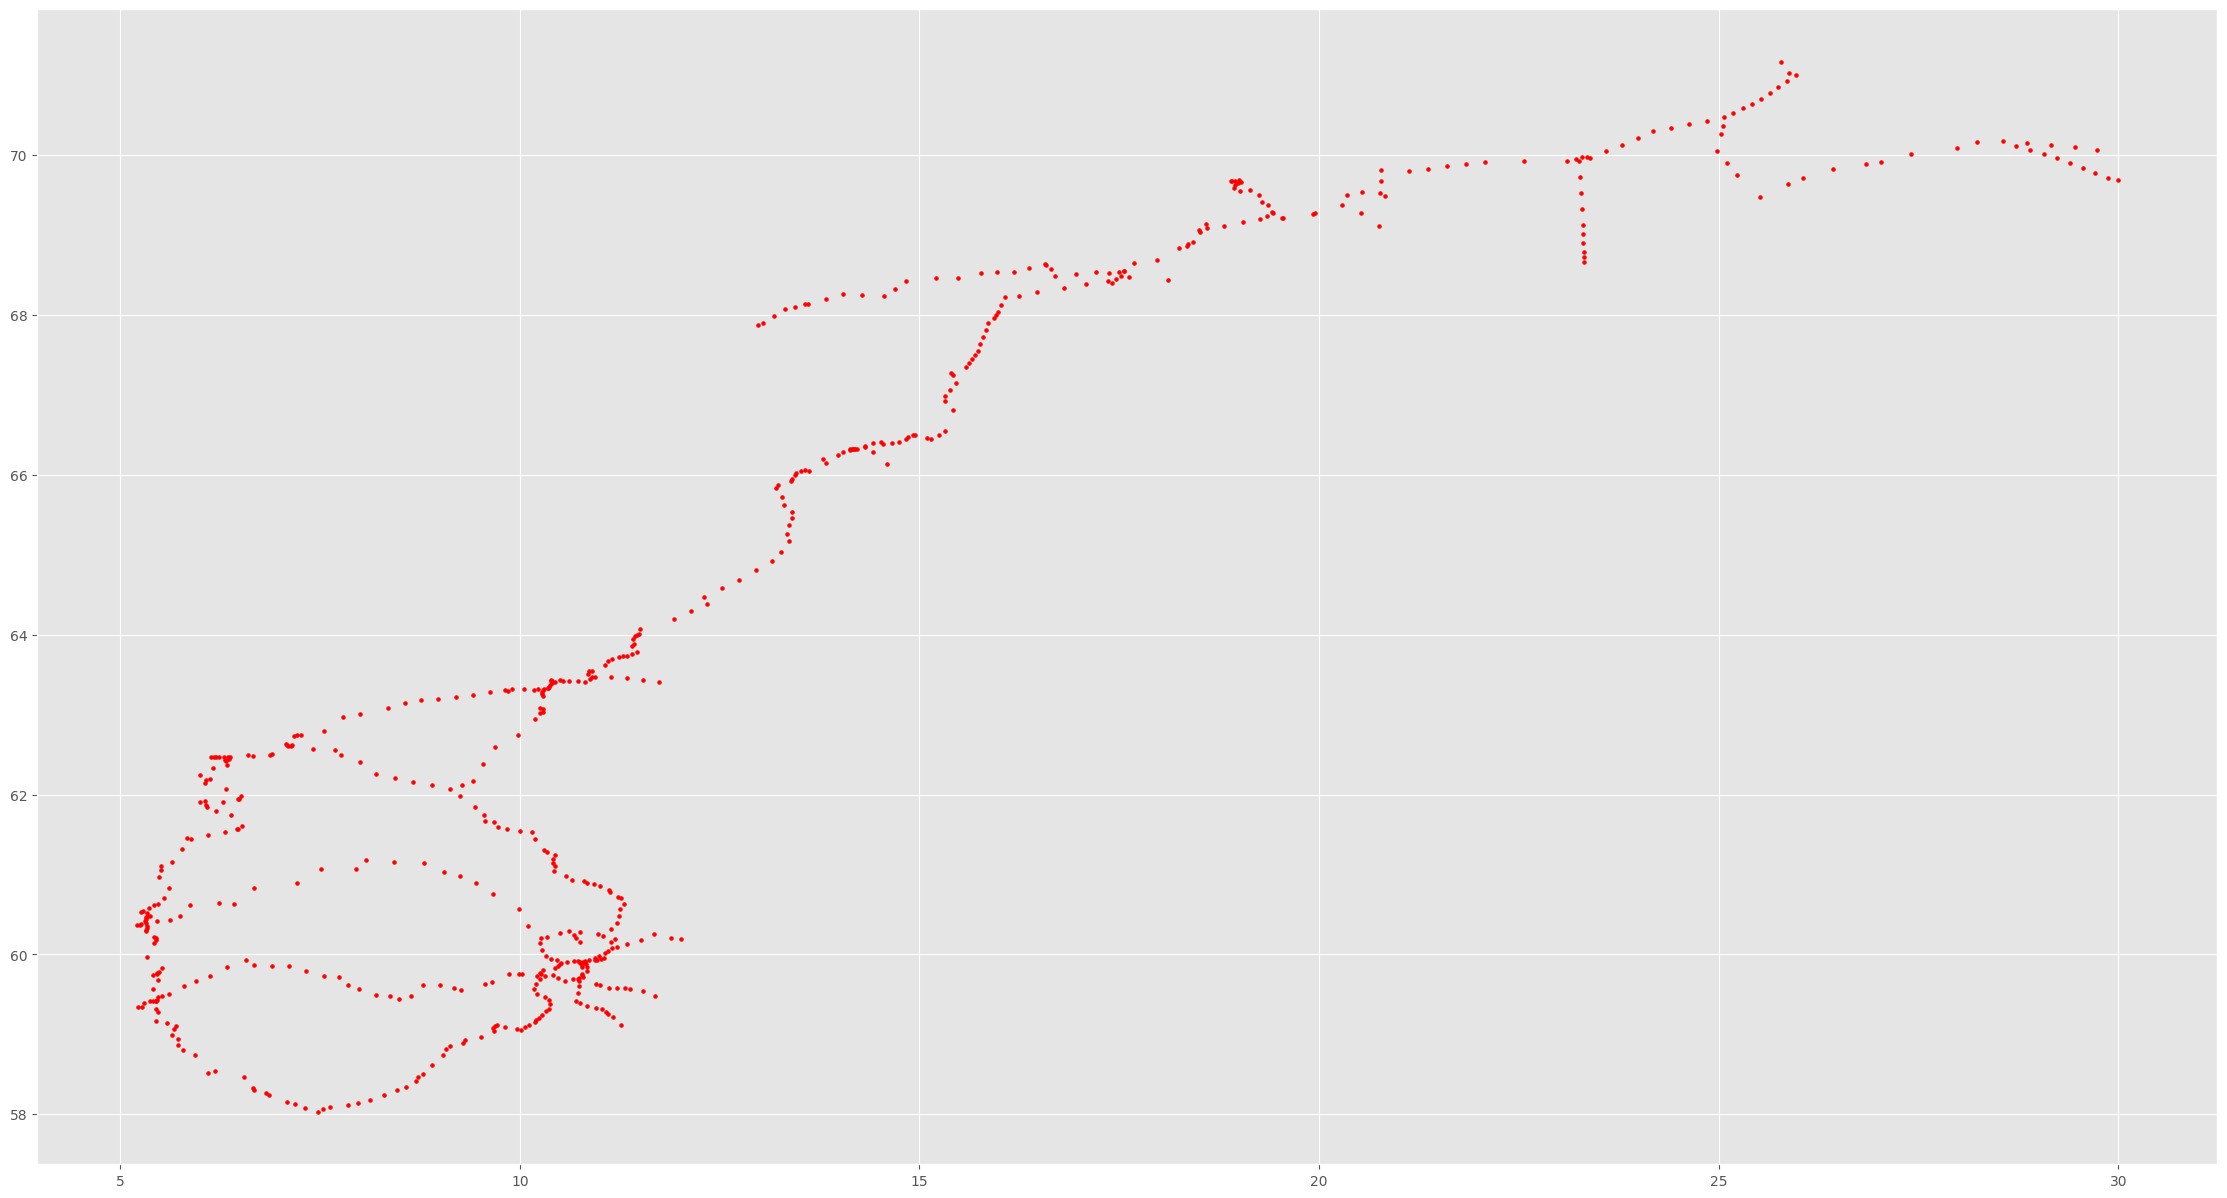

Much better.


In [63]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Plot the nodes and edges
new_gdf_ids.plot(ax=ax, color='red', markersize=7)
#new_edges_gdf.plot(ax=ax, color='blue')

# Show the plot
plt.show()
print("Much better.")


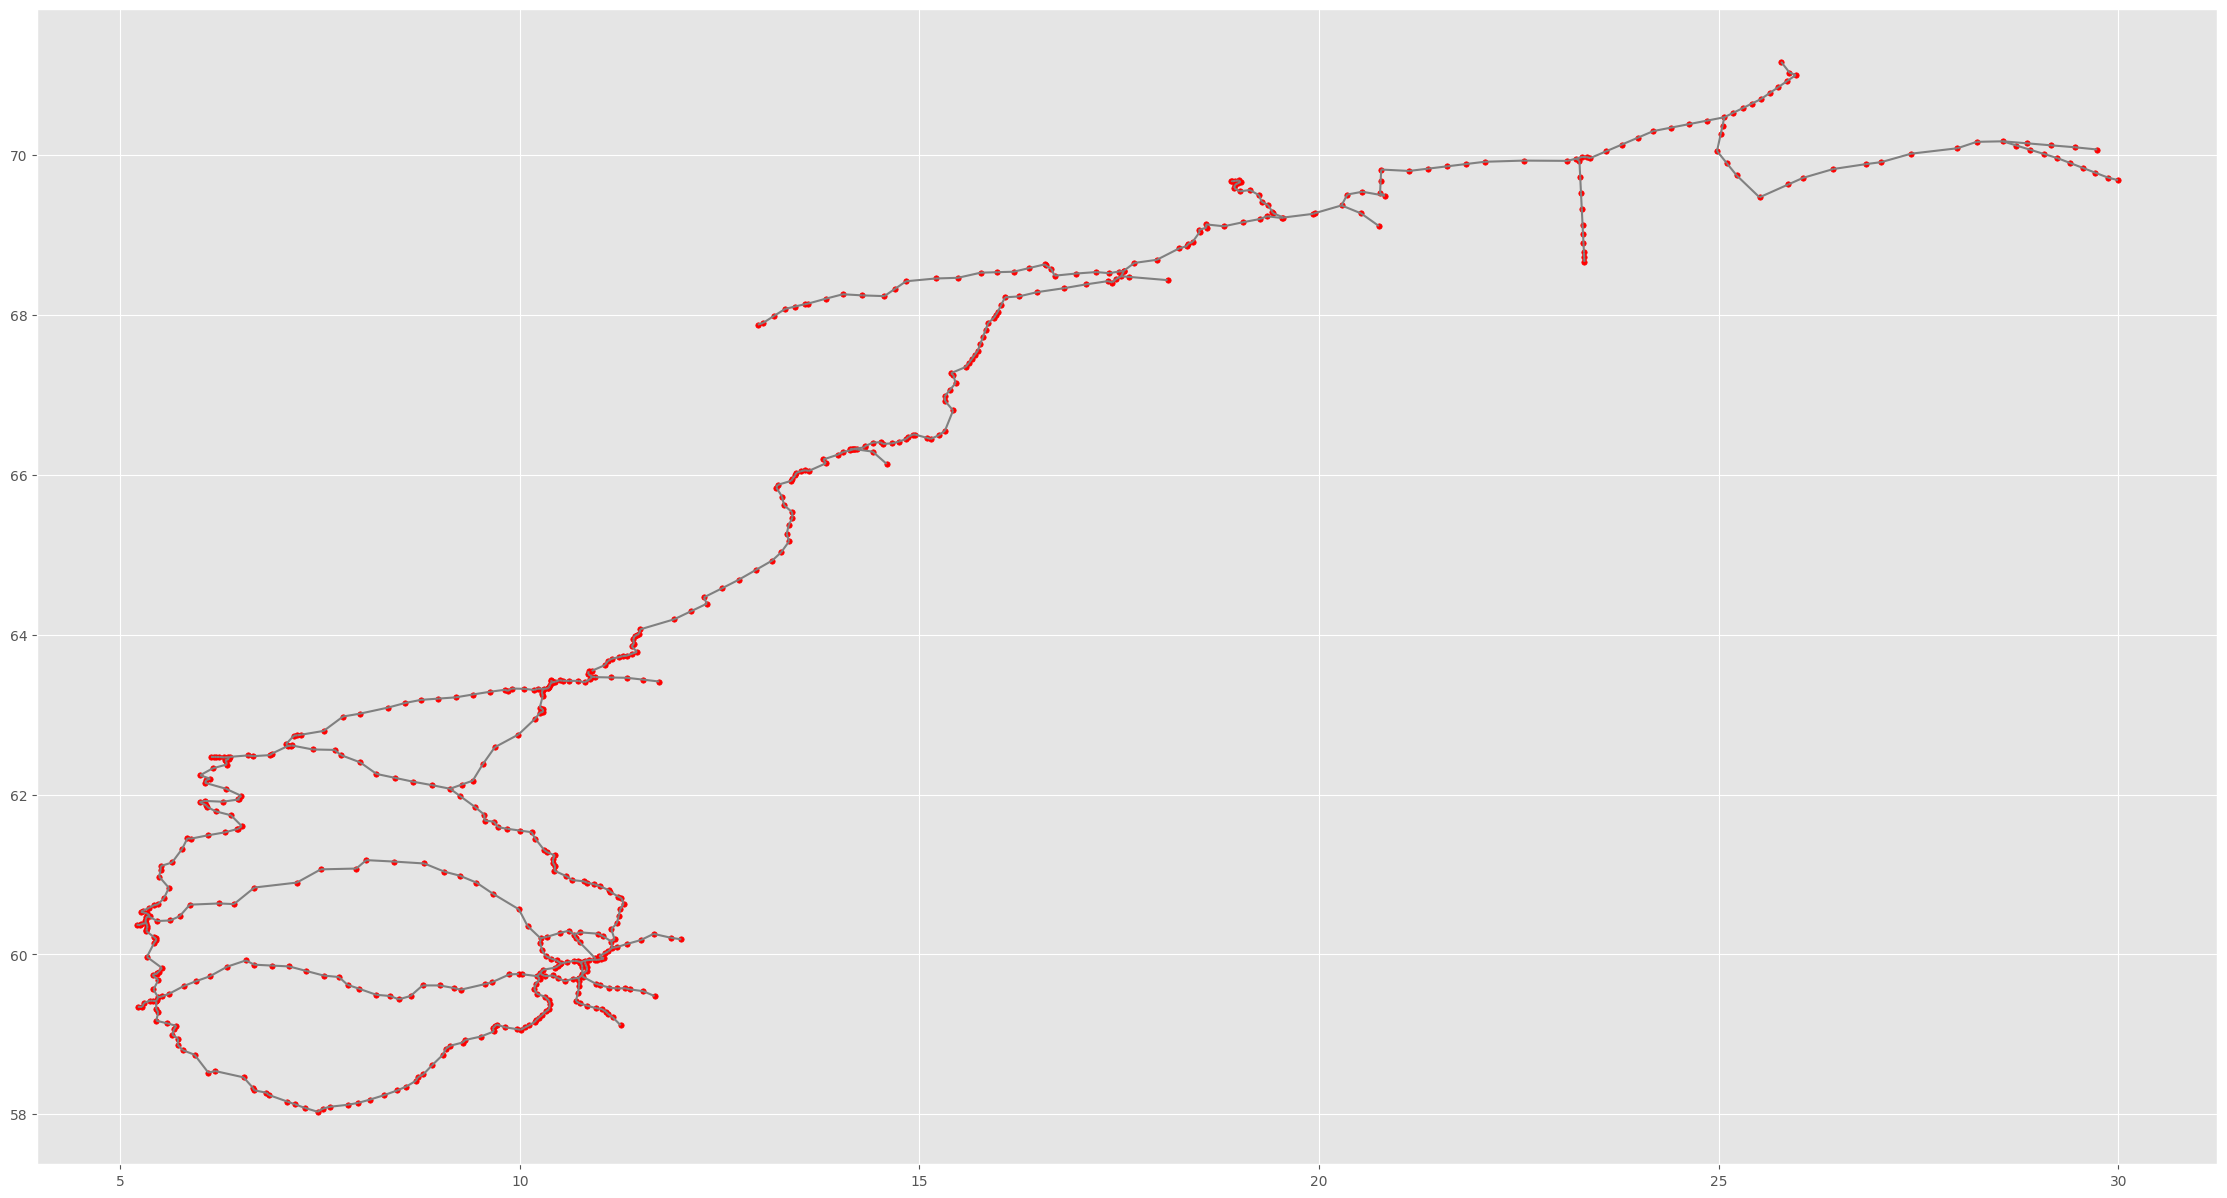

In [64]:
# Same plot but with the edges as well
# set style
plt.style.use('ggplot')
# Set the size of the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Plot the nodes and edges
new_edges_gdf.plot(ax=ax, color='grey')
new_gdf_ids.plot(ax=ax, color='red', markersize=15)

# Show the plot
plt.show()


<h4>To better explore the networks nodes and edges we can use Foliums OpenStreetMap function to show an interactive map<h4>

In [65]:
# Create a folium map object centered on the first node in the node geodataframe
map_obj = folium.Map(location=[new_gdf_ids.geometry.iloc[0].y, new_gdf_ids.geometry.iloc[0].x], zoom_start=10)

# Create a feature group for the edges
edge_fg = folium.FeatureGroup(name="Edges")

# Add each edge as a line to the feature group, with a popup displaying the edge weight
for i, row in new_edges_gdf.iterrows():
    popup_str = f"Edge ID: {row['edge_ID']}<br>Source: {row['source']}<br>Target: {row['target']}<br>Geometry: {row['geometry']}"
    folium.PolyLine(locations=[(row.geometry.coords[0][1], row.geometry.coords[0][0]),
                                (row.geometry.coords[1][1], row.geometry.coords[1][0])],
                    popup=popup_str,
                    tooltip=f"Edge ({row['edge_ID']}, {row['source']}, {row['target']}, {row['geometry']})").add_to(edge_fg)

# Add the edge feature group to the map
edge_fg.add_to(map_obj)

# Create a feature group for the nodes
node_fg = folium.FeatureGroup(name="Nodes")

# Add each node as a marker to the feature group, with a popup displaying the node ID and label
for i, row in new_gdf_ids.iterrows():
    popup_str = f"ID: {row['osmid']}<br>Latitude: {row['y']}<br>Longitude: {row['x']}<br>Gradient: {row['elevation']}']"
    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=popup_str,
                  tooltip=f"Node {row['osmid']}").add_to(node_fg)

# Add the node feature group to the map
node_fg.add_to(map_obj)

# Add a layer control to the map, allowing the user to toggle the visibility of the edge and node feature groups
folium.LayerControl().add_to(map_obj)

# Display the map
map_obj

<h2>Now we have the nodes and edges, we need to calculate the lenght on the edges between the new node-neighbours<h2>

In [66]:
# Set Coordinate System

new_edges_gdf.crs = {'init': 'epsg:4326'}
# Convert the CRS to a projected CRS that uses meters or kilometers as the units
new_edges_gdf = new_edges_gdf.to_crs({'init': 'epsg:4326'}) # Change the EPSG code to the appropriate UTM zone for your data


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [67]:
# Using the Haversine formula to calculate length

from math import radians, sin, cos, sqrt, atan2

# define the radius of the Earth in meters
R = 6371000

# create an empty list to store the edge lengths
edge_lengths = []

# loop over the geometry column of the edges_gdf GeoDataFrame
for line in new_edges_gdf['geometry']:
    coords = line.coords
    
    src_lon, src_lat = radians(coords[0][0]), radians(coords[0][1])
    tgt_lon, tgt_lat = radians(coords[1][0]), radians(coords[1][1])
    
    d_lon = tgt_lon - src_lon
    d_lat = tgt_lat - src_lat
    
    a = sin(d_lat/2)**2 + cos(src_lat) * cos(tgt_lat) * sin(d_lon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    edge_lengths.append(distance)

# add the edge lengths to the edges_gdf GeoDataFrame
new_edges_gdf['length_m'] = edge_lengths

# Convert the length from meters to kilometers
new_edges_gdf['length_km'] = new_edges_gdf['length_m'] / 1000



In [68]:
# THIS IS THE GEOPANDAS .lenght functions - does not look correct. What kind of measurement is this?

# Create a new column called 'length' and set it to zero
#new_edges_gdf['length_2'] = 0

# Loop through each row in the geodataframe and calculate the length
#for index, row in new_edges_gdf.iterrows():
#    length = row['geometry'].length
#    new_edges_gdf.at[index, 'length_2'] = length

#new_edges_gdf.head()

In [69]:
# Get basic statistics for the two fields
#\033[1mlength, length_weight, grade, grade_abs, and geometry\033[0m")
print('\033[1mSimplified Edges:\033[0m')
print(new_edges_gdf[['length_m', 'length_km']].describe().round(2))

print('\n\033[1mInitial Edges::\033[0m')
print(edge_gdf[['length']].describe().round(2))


Simplified Edges:
         length_m  length_km
count   623.00000  623.00000
mean   8430.44000    8.43000
std    5721.96000    5.72000
min     448.18000    0.45000
25%    4012.40000    4.01000
50%    7587.06000    7.59000
75%   11560.01000   11.56000
max   32621.05000   32.62000

Initial Edges::
           length
count  8178.00000
mean    995.46000
std    2921.69000
min       0.00000
25%      32.96000
50%     172.24000
75%     480.45000
max   30855.43000


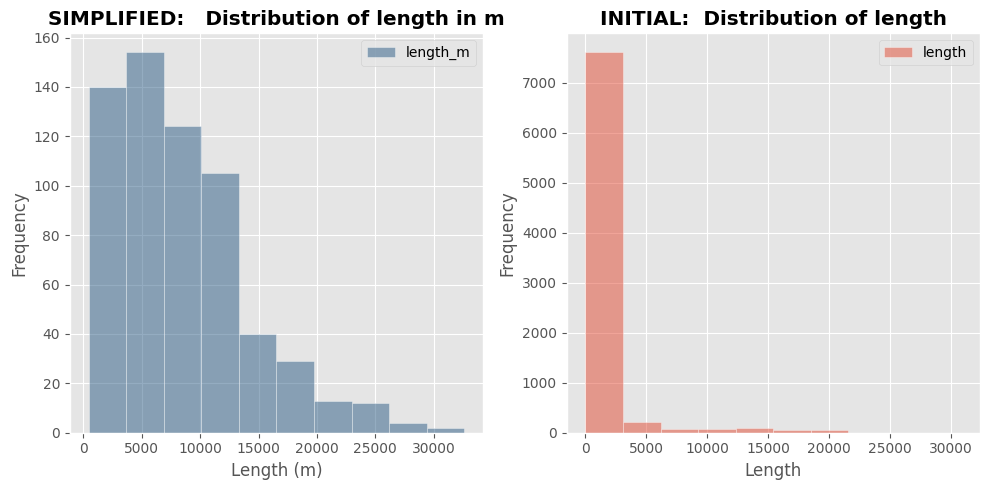

In [70]:
# set style
plt.style.use('ggplot')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the left subplot
axs[0].hist(new_edges_gdf['length_m'], bins=10, alpha=0.5, label='length_m', color='#2B5B84', edgecolor='white')
axs[0].set_title('SIMPLIFIED:   Distribution of length in m', fontweight='bold')
axs[0].set_xlabel('Length (m)')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot the second histogram on the right subplot
axs[1].hist(edge_df['length'], alpha=0.5, label='length', edgecolor='white')
axs[1].set_title('INITIAL:  Distribution of length', fontweight='bold')
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Show the figure
plt.tight_layout()
plt.show()

# set style to default
plt.style.use('default')

<h2>Now we need to add the effective length from the length and node-gradients<h2>

In [71]:
def grade_per_meter(node_df, edge_df):
    const = 0.372
    grade_intervals = [-0.09, -0.07, -0.05, -0.03, -0.01, 0.01, 0.03, 0.05, 0.07, 0.09, 0.11]
    increased_consumption = [-0.332, -0.217, -0.148, -0.121, -0.073, 0.085, 0.152, 0.203, 0.306, 0.358, 0.552]

    edge_df['gradient_per_meter'] = 0

    iterator = len(edge_df)

    for i in range(0, iterator):    

        source = edge_df.at[i, 'source']
        target = edge_df.at[i, 'target']
        edge_length = edge_df.at[i, 'length_m']

        source_gradient = node_df.loc[node_df['osmid'] == source, 'elevation'].iloc[0]
        target_gradient = node_df.loc[node_df['osmid'] == target, 'elevation'].iloc[0]

        grade_diff = source_gradient - target_gradient

        edge_df.at[i, 'gradient_per_meter'] = grade_diff / edge_length

    return


In [72]:
grade_per_meter(new_gdf_ids, new_edges_gdf)
new_edges_gdf.head(3)

,edge_ID,source,target,geometry,length_m,length_km,gradient_per_meter
0,0000,363114,155191,"LINESTRING (11.11829 60.80021, 11.12747 60.78620)",1635.45230,1.63545,-0.00655
1,0001,155191,351102,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)",8849.83969,8.84984,-0.00722
2,0002,351102,229327,"LINESTRING (11.22847 60.72376, 11.27194 60.70256)",3338.74431,3.33874,0.00837


In [73]:
new_edges_gdf['gradient_per_meter'].describe()

count   623.00000
mean     -0.00076
std       0.01097
min      -0.05772
25%      -0.00349
50%       0.00000
75%       0.00401
max       0.04572
Name: gradient_per_meter, dtype: float64

Normal Distribution.


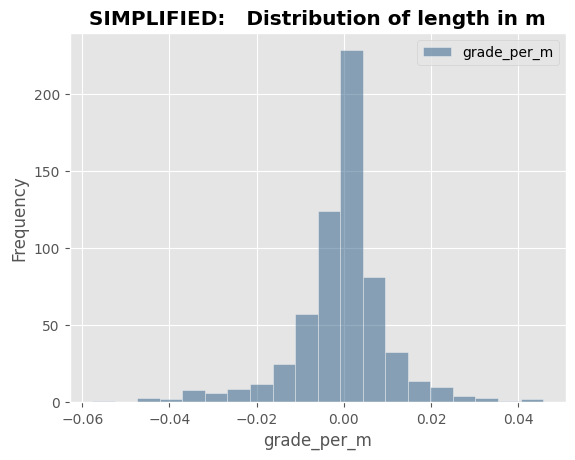

In [74]:
# set style
plt.style.use('ggplot')

# create histogram
plt.hist(new_edges_gdf['gradient_per_meter'], bins = 20, alpha=0.5, label='grade_per_m', edgecolor='white', color='#2B5B84')

# add titles and labels
plt.title('SIMPLIFIED:   Distribution of length in m', fontweight='bold')
plt.xlabel('grade_per_m')
plt.ylabel('Frequency')
plt.legend()

# display the plot
print('Normal Distribution.')
plt.show()

<h2>Converting Node and Edge GeoDataframes to one Network <h2>

In [75]:
# Set the CRS for both GeoDataFrames
new_gdf_ids.crs = {'init': 'epsg:4326'}
new_edges_gdf.crs = {'init': 'epsg:4326'}

# renaming columns
new_edges_gdf = new_edges_gdf.rename(columns={'source': 'u', 'target': 'v'})

# Add a 'key' column with a default value of 0
new_edges_gdf['key'] = 0

# Rearanging order
new_edges_gdf = new_edges_gdf[['u', 'v', 'key', 'length_m', 'length_km', 'gradient_per_meter', 'geometry']]

# rename the "elevation" column to "gradient" and move the x and y column 
new_gdf_ids = new_gdf_ids.rename(columns={'elevation': 'gradient'})
new_gdf_ids = new_gdf_ids[['osmid', 'roadclass', 'isBridge', 'isTunnel', 'artificial', 'gradient', 'x', 'y', 'geometry']]

# print the resulting GeoDataFrame
display(new_gdf_ids.head(1))
display(new_edges_gdf.head(1))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,osmid,roadclass,isBridge,isTunnel,artificial,gradient,x,y,geometry
0,155191,0,0,0,NaN,143.16000,11.12747,60.78620,POINT (11.12747 60.78620)


,u,v,key,length_m,length_km,gradient_per_meter,geometry
0,363114,155191,0,1635.45230,1.63545,-0.00655,"LINESTRING (11.11829 60.80021, 11.12747 60.78620)"


In [76]:
# Create an empty MultiDiGraph
N = nx.MultiDiGraph()

# Add nodes to the graph
for _, row in new_gdf_ids.iterrows():
    N.add_node(row['osmid'],
               y=row['y'],
               x=row['x'],
               gradient=row['gradient'],
               isBridge=row['isBridge'],
               isTunnel=row['isTunnel'],
               roadclass=row['roadclass'],
               geometry=row['geometry'])

# Add edges to the graph
for _, row in new_edges_gdf.iterrows():
    N.add_edge(row['u'],
               row['v'],
               key=row['key'],
               length_m=row['length_m'],
               length_km=row['length_km'],
               gradient_per_meter=row['gradient_per_meter'],
               geometry=row['geometry'])




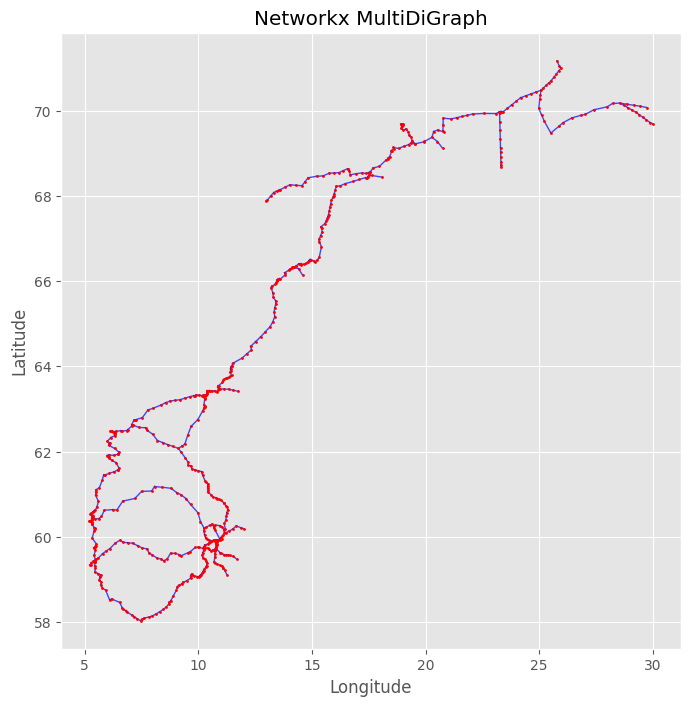

In [77]:
# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the edges
for u, v, data in N.edges(data=True):
    # Get the edge geometry
    edge_geometry = data['geometry']
    
    # Extract the x and y coordinates of the edge as separate lists
    x_coords, y_coords = edge_geometry.xy
    
    # Plot the edge
    ax.plot(x_coords, y_coords, color='blue', alpha=0.7, linewidth=1)

# Plot the nodes
for node, data in N.nodes(data=True):
    # Get the node geometry
    node_geometry = data['geometry']
    
    # Extract the x and y coordinates of the node
    x, y = node_geometry.xy
    
    # Plot the node
    ax.plot(x, y, 'o', color='red', markersize=1)

# Set the axis properties
ax.set_title('Networkx MultiDiGraph')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


<h3>... or like this<h3>

In [78]:
# Update the x and y columns to match the geometry column coordinates
new_gdf_ids['x'] = new_gdf_ids['geometry'].x
new_gdf_ids['y'] = new_gdf_ids['geometry'].y

# Set the index of the edge GeoDataFrame to a MultiIndex with columns (u, v, key)
new_edges_gdf.set_index(['u', 'v', 'key'], inplace=True)

# Create the MultiDiGraph from the GeoDataFrames
M = ox.graph_from_gdfs(new_gdf_ids, new_edges_gdf, graph_attrs={'crs': 'epsg:4326'})


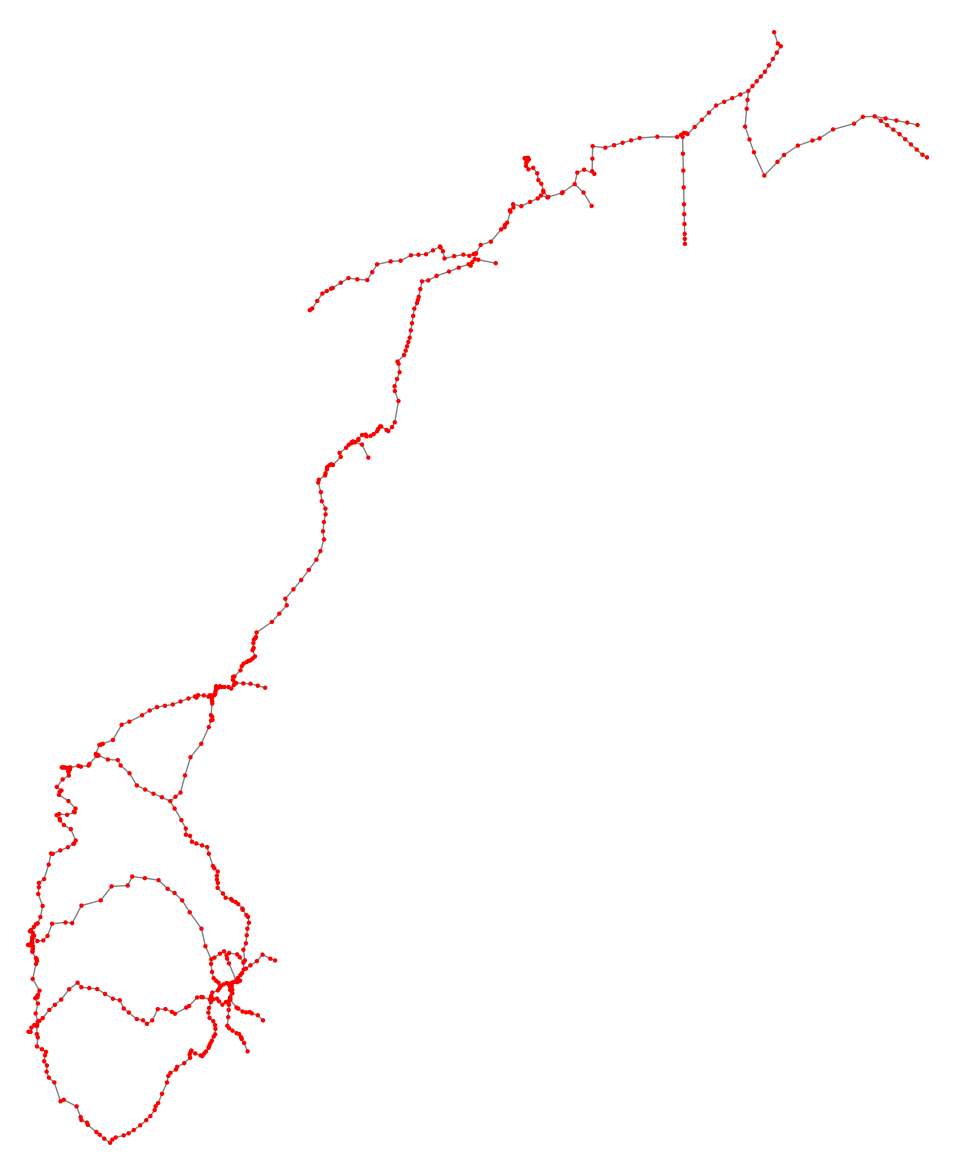

(<Figure size 3000x1500 with 1 Axes>, <AxesSubplot: >)

In [79]:
# Plot the graph
ox.plot_graph(M, figsize=(30, 15), node_color="red", edge_color="gray", bgcolor="white", node_size=10, edge_linewidth=1)

<h2>Adding traffick counts to edges<h2>

In [80]:
# Import Traffic Counts:
# Load volume dataset
csv_pd=pd.read_excel("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/weekly_data_xl.xlsx")
csv_pd.drop(columns='Unnamed: 0', inplace=True)
csv_pd.head(3)

,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.11504,10.45628,13023,2018,1,6512,6512
1,41379V1201935,MESNADALSARMEN,61.11504,10.45628,13998,2018,2,6999,6999
2,41379V1201935,MESNADALSARMEN,61.11504,10.45628,13878,2018,3,6939,6939


In [81]:
csv_pd_woDup = csv_pd.copy().drop_duplicates('id').reset_index(drop=True)
csv_pd_woDup.head(3)

,id,name,lat,lon,volume,year,month,volume1,volume2
0,41379V1201935,MESNADALSARMEN,61.11504,10.45628,13023,2018,1,6512,6512
1,43294V181263,MEHEIA STASJON,59.62971,9.49958,4098,2018,1,2049,2049
2,76082V578594,Svemarka,63.54271,10.86276,6651,2018,1,3326,3326


In [82]:
# Remove volume1 and volume2
csv_pd_woDup=csv_pd_woDup.drop("volume1", axis="columns")
csv_pd_woDup=csv_pd_woDup.drop("volume2", axis="columns")
csv_pd_woDup['geometry'] = csv_pd_woDup.apply(lambda x: Point(x['lon'], x['lat']), axis=1)
csv_pd_woDup.head(3)

,id,name,lat,lon,volume,year,month,geometry
0,41379V1201935,MESNADALSARMEN,61.11504,10.45628,13023,2018,1,POINT (10.456279 61.115044)
1,43294V181263,MEHEIA STASJON,59.62971,9.49958,4098,2018,1,POINT (9.499576 59.629705)
2,76082V578594,Svemarka,63.54271,10.86276,6651,2018,1,POINT (10.862757 63.542709)


In [83]:
csv_pd_woDup.describe()

,lat,lon,volume,year,month
count,641.00000,641.00000,641.00000,641.00000,641.00000
mean,62.11632,10.88055,10708.43682,2018.00000,1.38222
std,3.59170,5.42714,14834.16383,0.00000,1.79206
min,58.03173,5.27712,0.00000,2018.00000,1.00000
25%,59.77564,6.71517,1745.00000,2018.00000,1.00000
50%,60.41413,10.42148,5186.00000,2018.00000,1.00000
75%,63.32031,11.24117,12731.00000,2018.00000,1.00000
max,71.09131,31.10350,81453.00000,2018.00000,12.00000


In [84]:
traffic_counts = gpd.GeoDataFrame(csv_pd_woDup, geometry="geometry")
points_df = traffic_counts.copy()
traffic_counts.head(3)

,id,name,lat,lon,volume,year,month,geometry
0,41379V1201935,MESNADALSARMEN,61.11504,10.45628,13023,2018,1,POINT (10.45628 61.11504)
1,43294V181263,MEHEIA STASJON,59.62971,9.49958,4098,2018,1,POINT (9.49958 59.62971)
2,76082V578594,Svemarka,63.54271,10.86276,6651,2018,1,POINT (10.86276 63.54271)


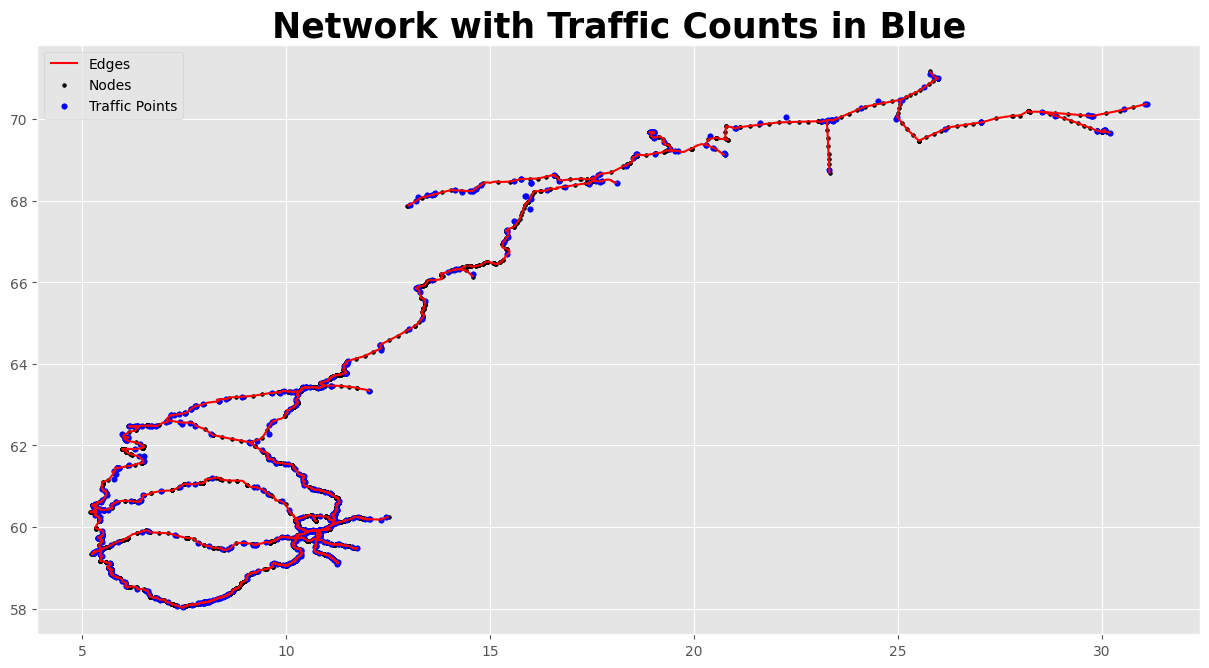

In [85]:
# set style to default
plt.style.use('ggplot')

# set up the plot
fig, ax = plt.subplots(figsize=(15, 10))

edge_gdf.plot(ax=ax, color='red')
node_gdf.plot(ax=ax, color='black', markersize=7)
traffic_counts.plot(ax=ax, color='blue', markersize=15)
ax.legend(['Edges', 'Nodes', 'Traffic Points'])
ax.set_title('Network with Traffic Counts in Blue', fontweight='bold', fontsize=25)

# display the plot
plt.show()


<h4>From the plot above we clearly notice (at least) two things:<h4>
<h5>First - from a visual perspective, the traffic counts represent a big (if not all) amount of the "important" roads (edges). In other words, there are always traffic counts on dead-ends, and around the crossroads.<h5>
<h5>Second, and maybe the most challenging - we notice there are not traffic counts BETWEEN all nodes, and therfore, not counts on all edges. How we will calculate this is for the time being uncertain. <h5>

<h3>Adding Traffic Count ID's to edges:<h3>

For some reason an error accurs when using network M - something wrong?

In [86]:
# loop through each point in the dataframe and find the nearest edge on the road network graph
for idx, row in tqdm(points_df.iterrows(), total=points_df.shape[0]):

    # get the shapely Point object for the current traffic point
    point = row['geometry']
    # find the nearest point on the road network graph
    nearest_node = None
    min_distance = float('inf')

    for node in N.nodes:
        # extract (x, y) coordinates from node attributes
        x, y = N.nodes[node]['x'], N.nodes[node]['y']
        node_point = Point(x, y)
        distance = point.distance(node_point)
        if distance < min_distance:
            nearest_node = node
            min_distance = distance
        else:
            pass # May need an additional else-statement which takes account for distance > min_distance

    # find the closest edge to the nearest point on the road network graph
    nearest_edge = None
    min_distance = float('inf')

    for edge in N.edges:
        # get the coordinates of the nodes in the edge tuple
        node1 = N.nodes[edge[0]]
        node2 = N.nodes[edge[1]]
        coords = [(node1['x'], node1['y']), (node2['x'], node2['y'])]

        # construct a LineString from the coordinates and compute the distance to the point
        distance = point.distance(LineString(coords))

        if distance < min_distance:
            nearest_edge = edge
            min_distance = distance
        else:
            pass
    
    # if the distance between the point and the closest point on the edge is below a certain threshold,
    # add the volume data to that edge's attribute in the road network graph
    if min_distance < 10: # adjust the threshold as needed
    # create a dictionary to hold the edge attributes
        edge_attrs = {}

        # update the dictionary with the new 'volume' attribute
        edge_attrs['trafficPoint_ID'] = row['id']
        #edge_attrs['volume'] = row['volume']

        # update the edge attributes in the graph using the dictionary
        N.edges[nearest_edge].update(edge_attrs)



100%|██████████| 641/641 [00:20<00:00, 31.84it/s]


In [87]:
# Store node attributes in a dictionary
node_attrs = {}
for node, attrs in N.nodes(data=True):
    node_attrs[node] = attrs

# Create a DataFrame from the node attributes
new_nodes_df = pd.DataFrame.from_dict(node_attrs, orient='index')

# Store edge attributes in a dictionary
edge_attrs = {}
for source, target, attrs in N.edges(data=True):
    edge_attrs[(source, target)] = attrs

# Create a DataFrame from the edge attributes
new_edges_df = pd.DataFrame.from_dict(edge_attrs, orient='index')

display(new_edges_df.head(5))
display(new_nodes_df.head(5))

,,length_m,length_km,gradient_per_meter,geometry,trafficPoint_ID
155191,351102,8849.83969,8.84984,-0.00722,LINESTRING (11.127465806112035 60.786204560258...,NaN
203067,203338,4227.06299,4.22706,0.00872,LINESTRING (11.101135541845837 63.668650098783...,37345V1742835
203338,628790,4737.15117,4.73715,-0.00323,LINESTRING (11.151803685511116 63.699318936454...,NaN
212063,264384,6796.72048,6.79672,0.00099,LINESTRING (10.698419987437997 60.208380663710...,NaN
225533,1804949,8602.29541,8.60230,-0.02418,LINESTRING (10.279030527523267 60.050952962361...,72438V180781


,y,x,gradient,isBridge,isTunnel,roadclass,geometry
155191,60.78620,11.12747,143.16000,0,0,0,POINT (11.127465806112035 60.78620456025842)
203067,63.66865,11.10114,55.21400,0,0,0,POINT (11.101135541845837 63.668650098783296)
203338,63.69932,11.15180,18.35000,0,0,0,POINT (11.151803685511116 63.69931893645423)
212063,60.20838,10.69842,244.06800,0,0,0,POINT (10.698419987437997 60.208380663710074)
225533,60.05095,10.27903,86.94300,0,0,0,POINT (10.279030527523267 60.050952962361045)


In [88]:
new_edges_gdf = gpd.GeoDataFrame(new_edges_df, geometry="geometry")
new_nodes_gdf = gpd.GeoDataFrame(new_nodes_df, geometry="geometry")
new_nodes_gdf.crs = {'init': 'epsg:4326'}
new_edges_gdf.crs = {'init': 'epsg:4326'}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<h3>Adding all counts (monthly) to the edges:<h3>

In [92]:
# Import Traffic Counts:
# Load volume dataset
trafficCount_df = pd.read_excel("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/weekly_data_xl.xlsx")
trafficCount_df.drop(columns='Unnamed: 0', inplace=True)
trafficCount_df = trafficCount_df.drop(columns=['name', 'lat', 'lon', 'year', 'volume1', 'volume2'])    # Drop unecessary columns
pivoted_df = trafficCount_df.pivot(index='id', columns='month', values='volume') #, aggfunc='sum')      # Get volume and months

new_edges_gdf = new_edges_gdf.reset_index(inplace=False)    # Unindex u and v

" new_edges_gdf = new_edges_gdf.reset_index(inplace=False)    # Unindex u and v\nnew_edges_gdf = new_edges_gdf.drop(columns='index')         # drop index-column\nnew_edges_gdf = new_edges_gdf.rename(columns={'level_0': 'u', 'level_1': 'v'})  # rename back to u and v\n\ndisplay(pivoted_df.head(5))\ndisplay(new_edges_gdf.head(5)) "

In [93]:
#new_edges_gdf = new_edges_gdf.reset_index(inplace=False)    # Unindex u and v
new_edges_gdf = new_edges_gdf.drop(columns='index')         # drop index-column
new_edges_gdf = new_edges_gdf.rename(columns={'level_0': 'u', 'level_1': 'v'})  # rename back to u and v

display(pivoted_df.head(5))
display(new_edges_gdf.head(5))

month,1,2,3,4,5,6,7,8,9,10,11,12
id,,,,,,,,,,,,
00000V1702725,10002.00000,9596.00000,9765.00000,10333.00000,10260.00000,11587.00000,10288.00000,11123.00000,10266.00000,10855.00000,11788.00000,12356.00000
00000V1702751,35838.00000,34800.00000,33886.00000,39673.00000,40976.00000,44202.00000,42728.00000,42922.00000,39273.00000,40556.00000,40479.00000,37035.00000
00000V443295,45704.00000,48198.00000,48216.00000,52830.00000,54808.00000,61031.00000,55277.00000,59859.00000,56073.00000,54632.00000,52830.00000,47071.00000
00000V443437,3412.00000,3733.00000,3925.00000,4093.00000,4210.00000,4689.00000,4612.00000,4784.00000,4658.00000,4504.00000,4160.00000,3714.00000
00109V1060678,7047.00000,7487.00000,7409.00000,8146.00000,8288.00000,9018.00000,8443.00000,9023.00000,8406.00000,8369.00000,8005.00000,7194.00000


,u,v,length_m,length_km,gradient_per_meter,geometry,trafficPoint_ID
0,155191,351102,8849.83969,8.84984,-0.00722,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)",NaN
1,203067,203338,4227.06299,4.22706,0.00872,"LINESTRING (11.10114 63.66865, 11.15180 63.69932)",37345V1742835
2,203338,628790,4737.15117,4.73715,-0.00323,"LINESTRING (11.15180 63.69932, 11.23839 63.71787)",NaN
3,212063,264384,6796.72048,6.79672,0.00099,"LINESTRING (10.69842 60.20838, 10.74748 60.15234)",NaN
4,225533,1804949,8602.29541,8.60230,-0.02418,"LINESTRING (10.27903 60.05095, 10.32489 59.97706)",72438V180781


In [94]:
result_df = pd.merge(new_edges_gdf, pivoted_df, how = 'left', left_on='trafficPoint_ID', right_on='id')
result_df = result_df.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'okt', 11: 'nov', 12: 'des'})
result_df

,u,v,length_m,length_km,gradient_per_meter,geometry,trafficPoint_ID,jan,feb,mar,apr,may,jun,jul,aug,sep,okt,nov,des
0,155191,351102,8849.83969,8.84984,-0.00722,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203067,203338,4227.06299,4.22706,0.00872,"LINESTRING (11.10114 63.66865, 11.15180 63.69932)",37345V1742835,6437.00000,7059.00000,7242.00000,8168.00000,8807.00000,9777.00000,10377.00000,10093.00000,8703.00000,8403.00000,7906.00000,6863.00000
2,203338,628790,4737.15117,4.73715,-0.00323,"LINESTRING (11.15180 63.69932, 11.23839 63.71787)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,212063,264384,6796.72048,6.79672,0.00099,"LINESTRING (10.69842 60.20838, 10.74748 60.15234)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225533,1804949,8602.29541,8.60230,-0.02418,"LINESTRING (10.27903 60.05095, 10.32489 59.97706)",72438V180781,11578.00000,13182.00000,13049.00000,12919.00000,12583.00000,14430.00000,14803.00000,15496.00000,14126.00000,13539.00000,12368.00000,11615.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1854915,1096879,9129.83783,9.12984,-0.00962,"LINESTRING (29.71391 69.77932, 29.87237 69.71822)",99160V930279,953.00000,1078.00000,1225.00000,1226.00000,1317.00000,1589.00000,1800.00000,1701.00000,1471.00000,1283.00000,1032.00000,1029.00000
619,1854916,1100062,8014.48217,8.01448,0.01058,"LINESTRING (26.83849 69.88667, 27.03455 69.91226)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,1854918,1854920,6488.47938,6.48848,0.00000,"LINESTRING (23.31478 68.78165, 23.31774 68.72331)",85233V930344,235.00000,263.00000,372.00000,357.00000,386.00000,586.00000,938.00000,677.00000,443.00000,303.00000,266.00000,255.00000
621,1854919,425412,9640.23223,9.64023,-0.00110,"LINESTRING (15.82742 67.81167, 15.85954 67.89752)",55974V2558758,643.00000,789.00000,874.00000,924.00000,1272.00000,1805.00000,2664.00000,1973.00000,1205.00000,1021.00000,834.00000,715.00000


<h3>Analysing edges with/without volume data<h3>

In [ ]:
# If necessary - drop edges without traffic counts
#new_edges_df = new_edges_df.dropna(subset=['trafficPoint_ID'])

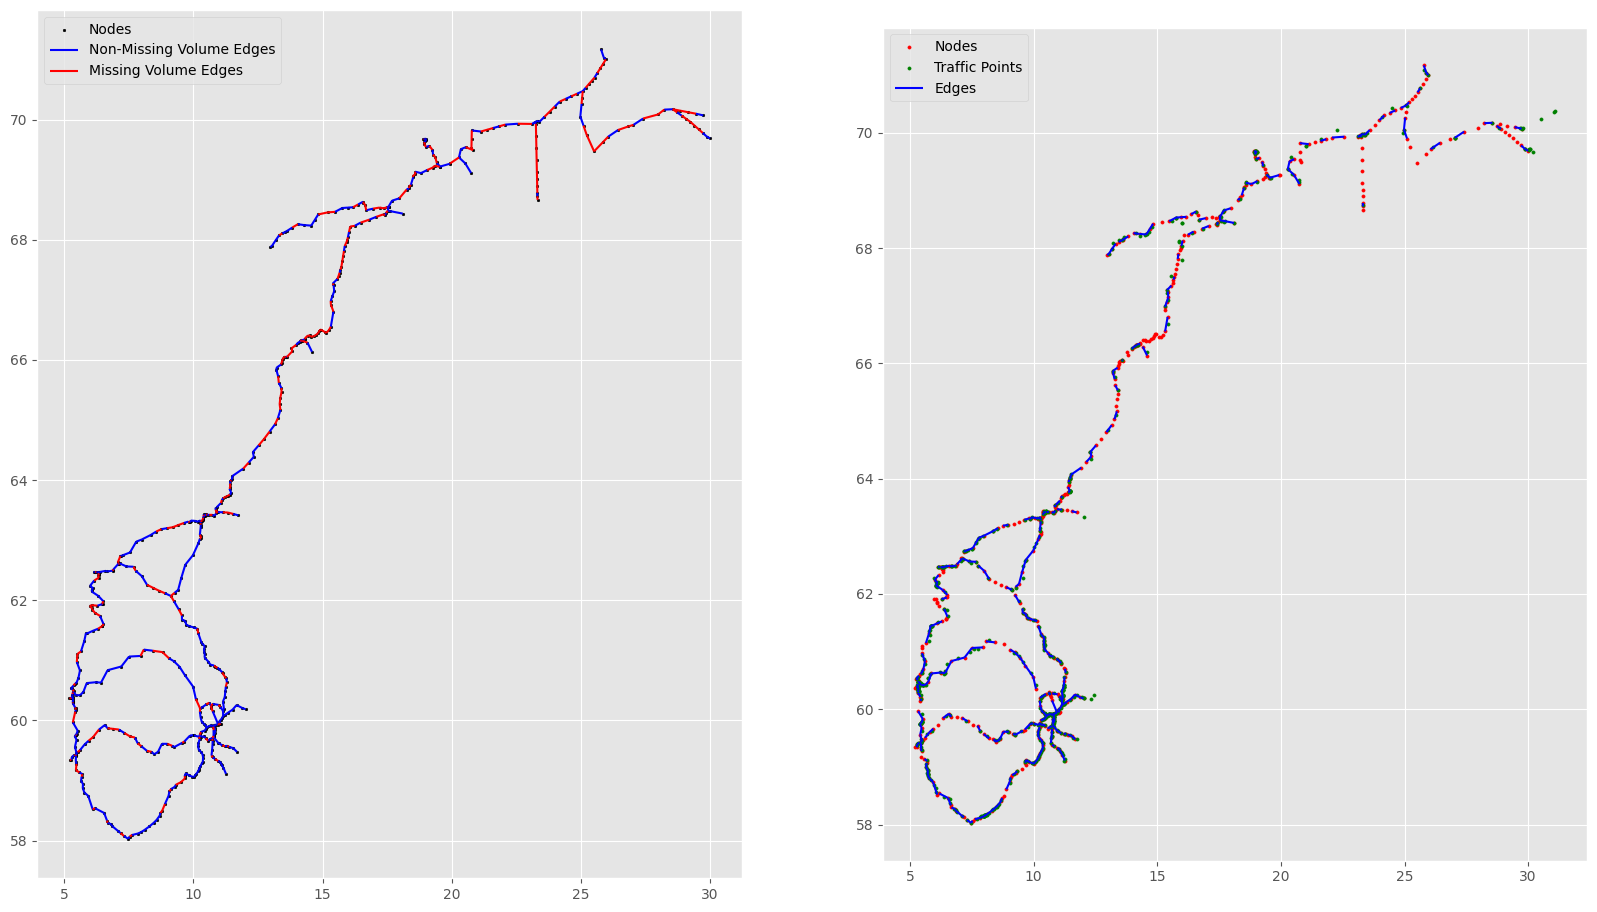

In [95]:
# Set the size of the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

plt.style.use('ggplot')

# Split the edges into two DataFrames for red and blue edges
red_edges_df = result_df[pd.isnull(result_df['trafficPoint_ID'])]
blue_edges_df = result_df[~pd.isnull(result_df['trafficPoint_ID'])]

# Plot the first graph on the first subplot
new_nodes_gdf.plot(ax=ax1, color='black', markersize=3, label='Nodes')
blue_edges_df.plot(ax=ax1, color='blue', label='Non-Missing Volume Edges')
red_edges_df.plot(ax=ax1, color='red', label='Missing Volume Edges')

# Filter the edges DataFrame to include only rows where "volume" is not null
new_edges_df_filtered = result_df.loc[~pd.isnull(result_df['trafficPoint_ID'])]

# Plot the filtered second graph on the second subplot
new_nodes_gdf.plot(ax=ax2, color='red', markersize=5, label='Nodes')
traffic_counts.plot(ax=ax2, color='green', markersize=5, label='Traffic Points')
new_edges_df_filtered.plot(ax=ax2, color='blue', label='Edges')

# Add a legend for the first plot
ax1.legend(loc = 'upper left')

# Add a legend for the second plot in the top left corner
ax2.legend(loc='upper left')

# Show the plots
plt.show()

On the first graph above we see the nodes(black), the edges with volume-data in blue, and the edges without volume-data in red. 
On the right we see the same network, but the edges without volume-data are exluded. Traffic points are plotted as green. This network appears to be disconnected, as only the edges containing traffic counts were retained. 

It is currently unclear how this will be considered in future modeling efforts.

<h3>Adding other Edge-Attributes (speed limit, road type, etc.)<h3>

In [96]:
display(new_nodes_df.head(2))
display(result_df.head(2))

,y,x,gradient,isBridge,isTunnel,roadclass,geometry
155191,60.78620,11.12747,143.16000,0,0,0,POINT (11.12747 60.78620)
203067,63.66865,11.10114,55.21400,0,0,0,POINT (11.10114 63.66865)


,u,v,length_m,length_km,gradient_per_meter,geometry,trafficPoint_ID,jan,feb,mar,apr,may,jun,jul,aug,sep,okt,nov,des
0,155191,351102,8849.83969,8.84984,-0.00722,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203067,203338,4227.06299,4.22706,0.00872,"LINESTRING (11.10114 63.66865, 11.15180 63.69932)",37345V1742835,6437.00000,7059.00000,7242.00000,8168.00000,8807.00000,9777.00000,10377.00000,10093.00000,8703.00000,8403.00000,7906.00000,6863.00000


In [98]:
edge_df.dropna(subset=["geometry"], inplace=True)
edge_df.head(2)

,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.74388,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]","LINESTRING (11.12747 60.78620, 11.12754 60.786..."
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.85930,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]","LINESTRING (11.12718 60.78643, 11.12699 60.786..."


In [112]:
result_df.head(2)

,u,v,length_m,length_km,gradient_per_meter,geometry,trafficPoint_ID,jan,feb,mar,apr,may,jun,jul,aug,sep,okt,nov,des
0,155191,351102,8849.83969,8.84984,-0.00722,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203067,203338,4227.06299,4.22706,0.00872,"LINESTRING (11.10114 63.66865, 11.15180 63.69932)",37345V1742835,6437.00000,7059.00000,7242.00000,8168.00000,8807.00000,9777.00000,10377.00000,10093.00000,8703.00000,8403.00000,7906.00000,6863.00000


In [114]:
edge_df.loc[edge_df['source'] == 155191]

,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.74388,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]","LINESTRING (11.12747 60.78620, 11.12754 60.786..."
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.85930,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]","LINESTRING (11.12718 60.78643, 11.12699 60.786..."


In [141]:
target = edge_df.loc[edge_df['source'] == 351102]['speedlim'].values#.reset_index(drop=True).values
target = edge_df.loc[edge_df['source'] == 351102]['speedlim'].values[0]

target


110

In [131]:
#edge_df.loc[edge_df['source'] == 155191]['speedlim'] == edge_df.loc[edge_df['source'] == 351102]['speedlim']
#edge_df.loc[edge_df['source'] == 155191]['speedlim'].reset_index(drop=True) == edge_df.loc[edge_df['source'] == 351102]['speedlim'].reset_index(drop=True)
edge_df.loc[edge_df['source'] == 155191]['speedlim'].reset_index(drop=True).values == edge_df.loc[edge_df['source'] == 351102]['speedlim'].reset_index(drop=True).values




array([ True, False])

In [144]:
result_df['speedlim'] = 0

for index, row in result_df.iterrows():
    
    source = row['u']
    target = row['v']

    m_source = edge_df.loc[edge_df['source'] == u]
    if len(m_source) > 1:
        m_source_speedlim = edge_df.loc[edge_df['source'] == u]['speedlim'].tolist()
    else:
        m_source_speedlim = edge_df.loc[edge_df['source'] == u]['speedlim']

    m_target = edge_df.loc[edge_df['source'] == v]
    if len(m_target) > 1:
        m_target_speedlim = edge_df.loc[edge_df['source'] == v]['speedlim'].tolist()
    else:
        m_target_speedlim = edge_df.loc[edge_df['source'] == v]['speedlim']


    if type(m_source_speedlim) != list and type(m_target_speedlim) != list: 
        if not m_source_speedlim.empty:
            m_source_speedlim = m_source_speedlim.values[0]
        if not m_target_speedlim.empty:
            m_target_speedlim = m_target_speedlim.values[0]





    # if not list 
    if type(m_source_speedlim) != list and type(m_target_speedlim) != list: 
        m_source_speedlim = m_source_speedlim.values[0]
        m_target_speedlim = m_target_speedlim.values[0]
        if m_source_speedlim == m_target_speedlim:
            speedlim = m_target_speedlim
        elif type(m_target_speedlim) != list and type(m_target_speedlim) != list and m_source_speedlim != m_target_speedlim:
            speedlim = (m_source_speedlim + m_target_speedlim) / 2
        else:
            speedlim = 'Error 1'

    # if list on not list
    elif type(m_source_speedlim) == list and type(m_target_speedlim) != list:
        for i in m_source_speedlim:
            if m_source_speedlim[i] == m_target_speedlim:
                speedlim = m_source_speedlim[i]
            else:
                speedlim = 'Error 2'

    # if not list and list 
    elif type(m_target_speedlim) == list and type(m_source_speedlim) != list:
        for i in m_target_speedlim:
            if m_target_speedlim[i] == m_source_speedlim:
                speedlim = m_target_speedlim[i]
            else:
                speedlim = 'Error 3'
    
    # if list and list
    #elif type(m_target_speedlim) == list and type(m_target_speedlim) == list:





IndexError: list index out of range

In [137]:
speedlim

'Error 1'

In [99]:
# Store node attributes in a dictionary
node_attrs = {}
for node, attrs in G.nodes(data=True):
    node_attrs[node] = attrs

# Create a DataFrame from the node attributes
m_node_df = pd.DataFrame.from_dict(node_attrs, orient='index')

# Convert the edge data to a pandas DataFrame
edge_data = G.edges(data=True)
m_edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

# Extract the data into separate columns
m_edge_df = pd.concat([m_edge_df.drop('data_dict', axis=1), m_edge_df['data_dict'].apply(pd.Series)], axis=1)

In [104]:
# Store node attributes in a dictionary
node_attrs = {}
for node, attrs in M.nodes(data=True):
    node_attrs[node] = attrs

# Create a DataFrame from the node attributes
m_node_df = pd.DataFrame.from_dict(node_attrs, orient='index')

# Convert the edge data to a pandas DataFrame
edge_data = M.edges(data=True)
m_edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

In [105]:
m_edge_df

,source,target,data_dict
0,363114,155191,"{'length_m': 1635.4522979465962, 'length_km': ..."
1,363114,356032,"{'length_m': 8605.134634480804, 'length_km': 8..."
2,155191,351102,"{'length_m': 8849.839693949072, 'length_km': 8..."
3,351102,229327,"{'length_m': 3338.7443064998647, 'length_km': ..."
4,229327,1287001,"{'length_m': 7869.839436806551, 'length_km': 7..."
...,...,...,...
618,1854816,1854901,"{'length_m': 9081.94026463204, 'length_km': 9...."
619,1854901,1854879,"{'length_m': 9093.64792001024, 'length_km': 9...."
620,1854879,1854915,"{'length_m': 9105.36994698392, 'length_km': 9...."
621,1854915,1096879,"{'length_m': 9129.837832953795, 'length_km': 9..."


In [102]:
# normalize the data_dict column
data = pd.json_normalize(m_edge_df['data_dict'])
# merge the normalized data with the original dataframe
m_edge_df = pd.concat([m_edge_df[['source', 'target']], data], axis=1)

In [103]:
m_edge_df

,source,target,length_m,length_km,gradient_per_meter,geometry
0,363114,155191,1635.45230,1.63545,-0.00655,LINESTRING (11.118288127288716 60.800214155854...
1,363114,356032,8605.13463,8.60513,-0.01017,LINESTRING (11.118288127288716 60.800214155854...
2,155191,351102,8849.83969,8.84984,-0.00722,LINESTRING (11.127465806112035 60.786204560258...
3,351102,229327,3338.74431,3.33874,0.00837,LINESTRING (11.228469072125108 60.723759077603...
4,229327,1287001,7869.83944,7.86984,-0.00190,LINESTRING (11.271937586492612 60.702559900949...
...,...,...,...,...,...,...
618,1854816,1854901,9081.94026,9.08194,0.00000,LINESTRING (29.239183851956515 69.962357686201...
619,1854901,1854879,9093.64792,9.09365,0.00000,LINESTRING (29.39742621388858 69.9013447205116...
620,1854879,1854915,9105.36995,9.10537,0.00000,LINESTRING (29.555668575820647 69.840331754821...
621,1854915,1096879,9129.83783,9.12984,-0.00962,LINESTRING (29.71391093775271 69.7793187891322...
